In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi

def wrap(job,job_id,task_id):
    def singlerun(kf,phit,phi,L,run,duration):
        import numpy as np
        rm=0.005
        D=1.
        R=2*rm
        rng = GSLRandomNumberGenerator()
        rng.seed(run)   
        f=1.0208582         
        rv=rm*f
        td =(2*rv)**2/(6*D)   
        kd = 4*math.pi*R*D*2
        kb=kf*kd
        with species_attributes():
            C | {'D':str(0.0),'radius':str(rv)}
            E | {'D':str(D),'radius':str(rv)}
            S | {'D':str(D),'radius':str(rv)}
            ES | {'D':str(0.0),'radius':str(rv)}
        with reaction_rules():
            #E+S >ES | kb
            E+S>~E+~S|kb


        m=get_model()
        w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),rv,rng)
        w.bind_to(m)
        size=tuple(w.calculate_shape(Real3(L,L,L),rv))    
        Nev = size[0]*size[1]*size[2]
        NS=int(Nev*phit)
        NE=int(NS/5)
        Nc=int(Nev*phi)            
        w.add_molecules(Species('C'), Nc)
        w.add_molecules(Species('S'), NS)
        w.add_molecules(Species('E'), NE)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        #duration = duration*td
        obs=FixedIntervalNumberObserver(td,['E','S'])
        sim.run(duration,obs)        
        #tlogs,nalog=np.array(obs.data()).T
        if run==1:
            print('kf={},phit={},phi={},L={}'.format(kf,phit,phi,L))
            #print('td={:.4e},kb={:.4e},kr={:.4e},kub={:.4e},kon={:.4e},Nc={},NE={},NS={},duration={:.4e}'.format(td,kb,kr,kub,kon,Nc,NE,NS,duration))
        return obs.data()#tlogs,nalog
    job.update({'run':task_id})
    out=singlerun(**job)
    return out

def exe(jobs,simrun):    
    #res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=60,modules=('numpy','ecell4','math'))[0]
    res=ensemble.run_slurm(wrap,jobs,n=simrun,nproc=60,path='tmp',modules=('numpy','ecell4','math'),extra_args=['--exclude=ibc[02,12,27]'])[0]
    res = np.array(res)
    meanres = np.mean(res,axis=0)   
    tt=meanres.T[0]
    Ne=meanres.T[1]
    Ns=meanres.T[2]
    #Nes=meanres.T[3]
    name='/home/chew/outputdata/3Dirxncrowding_kf{:.1f}_phi{:.1f}phit{:.3f}L{}_Nratio5'.format(jobs[0]["kf"],jobs[0]["phi"],jobs[0]["phit"],jobs[0]["L"])
    f=open(name,'w')
    np.savetxt(name,np.column_stack([tt,Ns,Ne]),delimiter=',')
    f.close()    
    print(name,len(tt))
    plt.plot(tt,Ne,label='E')
    plt.semilogx(tt,Ns,label='S')
    #plt.plot(tt,Nes,label='ES')
    print('first',Ns[0],'last',Ns[-1])
    print('first',Ne[0],'last',Ne[-1])
    plt.legend()

DEBUG:sge:Submitted batch job 3018637
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[1-100%60]     debug sge-r597     chew PD       0:00      1 (None)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:34:25      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:34:25      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:34:25      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:34:58      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:34:58      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:34:58      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:34:58      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:34:58      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:34:58      1 ibc19
DEBUG:sge:       

DEBUG:sge:        3018637_14     debug sge-r597     chew  R       0:09      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R       0:09      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R       0:09      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R       0:09      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R       0:09      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R       0:09      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R       0:09      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R       0:09      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R       0:09      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R       0:09      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R       0:09      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R       0:09      

DEBUG:sge:         3018637_9     debug sge-r597     chew  R       0:19      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R       0:19      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R       0:19      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R       0:19      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R       0:19      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R       0:19      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R       0:19      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R       0:19      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R       0:19      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R       0:19      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R       0:19      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R       0:19      

DEBUG:sge:         3018637_4     debug sge-r597     chew  R       0:29      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R       0:29      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R       0:29      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R       0:29      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R       0:29      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R       0:29      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R       0:29      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R       0:29      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R       0:29      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R       0:29      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R       0:29      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R       0:29      

DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:31:09      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:31:09      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R       0:39      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R       0:39      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R       0:39      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R       0:39      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R       0:39      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R       0:39      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R       0:39      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R       0:39      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R       0:39      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R       0:39    

DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:05:15      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:05:15      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:31:32      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:31:26      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:31:23      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:31:20      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:31:20      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R       0:50      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R       0:50      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R       0:50      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R       0:50      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R       0:5

DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:05:25      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:05:25      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:05:25      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:05:25      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:05:25      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:05:25      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:05:25      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:31:42      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:31:36      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:31:33      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:31:30      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00

DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:05:36      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:05:36      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:05:36      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:05:35      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:05:35      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:05:35      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:05:35      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:05:35      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:05:35      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:05:35      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:05:35      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01

DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:36:19      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:05:46      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:05:46      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:05:46      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:05:46      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:05:46      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:05:46      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:05:46      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:05:45      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:05:45      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:05:45      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01

DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:36:29      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:36:29      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:36:29      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:36:29      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:36:29      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:36:29      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:05:56      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:05:56      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:05:56      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:05:56      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:05:56      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01

DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:36:39      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:36:39      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:36:39      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:36:39      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:36:39      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:36:39      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:36:39      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:36:39      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:36:39      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:36:39      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:36:39      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01

DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:36:16      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:36:49      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:36:49      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:36:49      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:36:49      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:36:49      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:36:49      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:36:49      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:36:49      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:36:49      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:36:49      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01

INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:36:26      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:36:26      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:36:26      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:36:59      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:36:59      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:36:59      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:36:59      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:36:59      1 ibc06
DEBUG:sge:   

DEBUG:sge:        3018637_56     debug sge-r597     chew  R       2:00      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R       2:00      1 ibc03
DEBUG:sge:        3018637_58     debug sge-r597     chew  R       2:00      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R       2:00      1 ibc03
DEBUG:sge:        3018637_60     debug sge-r597     chew  R       2:00      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:36:36      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:36:36      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:36:36      1 ibc01
DEBUG:s

DEBUG:sge:        3018637_51     debug sge-r597     chew  R       2:10      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R       2:10      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R       2:10      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R       2:10      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R       2:10      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R       2:10      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R       2:10      1 ibc03
DEBUG:sge:        3018637_58     debug sge-r597     chew  R       2:10      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R       2:10      1 ibc03
DEBUG:sge:        3018637_60     debug sge-r597     chew  R       2:10      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018637_46     debug sge-r597     chew  R       2:20      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R       2:20      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R       2:20      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R       2:20      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R       2:20      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R       2:20      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R       2:20      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R       2:20      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R       2:20      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R       2:20      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R       2:20      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R       2:20      

DEBUG:sge:        3018637_41     debug sge-r597     chew  R       2:30      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R       2:30      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R       2:30      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R       2:30      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R       2:30      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R       2:30      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R       2:30      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R       2:30      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R       2:30      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R       2:30      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R       2:30      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R       2:30      

DEBUG:sge:        3018637_36     debug sge-r597     chew  R       2:41      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R       2:41      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R       2:41      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R       2:41      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R       2:41      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R       2:41      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R       2:41      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R       2:41      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R       2:41      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R       2:41      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R       2:41      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R       2:41      

DEBUG:sge:        3018637_31     debug sge-r597     chew  R       2:51      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R       2:51      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R       2:51      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R       2:51      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R       2:51      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R       2:51      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R       2:51      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R       2:51      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R       2:51      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R       2:51      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R       2:51      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R       2:51      

DEBUG:sge:        3018637_26     debug sge-r597     chew  R       3:01      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R       3:01      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R       3:01      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R       3:01      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R       3:01      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R       3:01      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R       3:01      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R       3:01      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R       3:01      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R       3:01      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R       3:01      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R       3:01      

DEBUG:sge:        3018637_21     debug sge-r597     chew  R       3:11      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R       3:11      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R       3:11      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R       3:11      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R       3:11      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R       3:11      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R       3:11      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R       3:11      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R       3:11      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R       3:11      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R       3:11      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R       3:11      

DEBUG:sge:        3018637_16     debug sge-r597     chew  R       3:21      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R       3:21      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R       3:21      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R       3:21      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R       3:21      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R       3:21      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R       3:21      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R       3:21      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R       3:21      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R       3:21      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R       3:21      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R       3:21      

DEBUG:sge:        3018637_11     debug sge-r597     chew  R       3:31      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R       3:31      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R       3:31      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R       3:31      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R       3:31      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R       3:31      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R       3:31      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R       3:31      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R       3:31      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R       3:31      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R       3:31      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R       3:31      

DEBUG:sge:         3018637_6     debug sge-r597     chew  R       3:41      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R       3:41      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R       3:41      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R       3:41      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R       3:41      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R       3:41      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R       3:41      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R       3:41      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R       3:41      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R       3:41      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R       3:41      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R       3:41      

DEBUG:sge:         3018637_1     debug sge-r597     chew  R       3:51      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R       3:51      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R       3:51      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R       3:51      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R       3:51      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R       3:51      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R       3:51      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R       3:51      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R       3:51      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R       3:51      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R       3:51      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R       3:51      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:34:43      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:34:37      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:34:34      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:34:31      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:34:31      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R       4:01      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R       4:01      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R       4:01      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R       4:01      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R       4:01      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R       4:01      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R       4:01 

DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:08:36      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:08:36      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:08:36      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:08:36      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:08:36      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:34:53      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:34:47      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:34:44      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:34:41      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:34:41      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R       4:11      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R       

DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:08:48      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:08:47      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:08:47      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:08:47      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:08:47      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:08:47      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:08:47      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:08:47      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:08:47      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:08:47      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:35:04      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00

DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:08:58      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:08:58      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:08:58      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:08:58      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:08:58      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:08:58      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:08:57      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:08:57      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:08:57      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:08:57      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:08:57      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01

DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:39:41      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:39:41      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:39:41      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:39:41      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:09:08      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:09:08      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:09:08      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:09:08      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:09:08      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:09:08      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:09:08      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01

DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:39:51      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:39:51      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:39:51      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:39:51      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:39:51      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:39:51      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:39:51      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:39:51      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:39:51      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:09:18      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:09:18      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01

DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:40:01      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:40:01      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:40:01      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:40:01      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:40:01      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:40:01      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:40:01      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:40:01      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:40:01      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:40:01      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:40:01      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01

DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:39:38      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:39:38      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:39:38      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:40:11      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:40:11      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:40:11      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:40:11      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:40:11      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:40:11      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:40:11      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018637_58     debug sge-r597     chew  R       5:12      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R       5:12      1 ibc03
DEBUG:sge:        3018637_60     debug sge-r597     chew  R       5:12      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:39:48      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:39:48      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:39:48      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:40:21      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:40:21      1 ibc04
DEBUG

DEBUG:sge:        3018637_53     debug sge-r597     chew  R       5:22      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R       5:22      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R       5:22      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R       5:22      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R       5:22      1 ibc03
DEBUG:sge:        3018637_58     debug sge-r597     chew  R       5:22      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R       5:22      1 ibc03
DEBUG:sge:        3018637_60     debug sge-r597     chew  R       5:22      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:        3018637_48     debug sge-r597     chew  R       5:32      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R       5:32      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R       5:32      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R       5:32      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R       5:32      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R       5:32      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R       5:32      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R       5:32      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R       5:32      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R       5:32      1 ibc03
DEBUG:sge:        3018637_58     debug sge-r597     chew  R       5:32      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R       5:32      

DEBUG:sge:        3018637_43     debug sge-r597     chew  R       5:42      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R       5:42      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R       5:42      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R       5:42      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R       5:42      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R       5:42      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R       5:42      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R       5:42      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R       5:42      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R       5:42      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R       5:42      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R       5:42      

DEBUG:sge:        3018637_38     debug sge-r597     chew  R       5:52      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R       5:52      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R       5:52      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R       5:52      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R       5:52      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R       5:52      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R       5:52      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R       5:52      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R       5:52      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R       5:52      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R       5:52      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R       5:52      

DEBUG:sge:        3018637_33     debug sge-r597     chew  R       6:02      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R       6:02      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R       6:02      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R       6:02      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R       6:02      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R       6:02      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R       6:02      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R       6:02      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R       6:02      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R       6:02      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R       6:02      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R       6:02      

DEBUG:sge:        3018637_28     debug sge-r597     chew  R       6:13      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R       6:13      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R       6:13      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R       6:13      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R       6:13      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R       6:13      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R       6:13      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R       6:13      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R       6:13      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R       6:13      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R       6:13      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R       6:13      

DEBUG:sge:        3018637_23     debug sge-r597     chew  R       6:23      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R       6:23      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R       6:23      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R       6:23      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R       6:23      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R       6:23      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R       6:23      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R       6:23      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R       6:23      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R       6:23      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R       6:23      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R       6:23      

DEBUG:sge:        3018637_18     debug sge-r597     chew  R       6:33      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R       6:33      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R       6:33      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R       6:33      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R       6:33      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R       6:33      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R       6:33      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R       6:33      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R       6:33      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R       6:33      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R       6:33      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R       6:33      

DEBUG:sge:        3018637_13     debug sge-r597     chew  R       6:43      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R       6:43      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R       6:43      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R       6:43      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R       6:43      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R       6:43      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R       6:43      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R       6:43      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R       6:43      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R       6:43      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R       6:43      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R       6:43      

DEBUG:sge:         3018637_8     debug sge-r597     chew  R       6:53      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R       6:53      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R       6:53      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R       6:53      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R       6:53      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R       6:53      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R       6:53      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R       6:53      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R       6:53      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R       6:53      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R       6:53      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R       6:53      

DEBUG:sge:         3018637_3     debug sge-r597     chew  R       7:03      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R       7:03      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R       7:03      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R       7:03      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R       7:03      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R       7:03      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R       7:03      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R       7:03      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R       7:03      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R       7:03      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R       7:03      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R       7:03      

DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:37:46      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:37:43      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:37:43      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R       7:13      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R       7:13      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R       7:13      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R       7:13      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R       7:13      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R       7:13      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R       7:13      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R       7:13      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R       7:13   

DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:11:48      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:11:48      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:11:48      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:38:05      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:37:59      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:37:56      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:37:53      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:37:53      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R       7:23      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R       7:23      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R       7:23      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R       7:

DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:11:58      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:11:58      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:11:58      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:11:58      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:11:58      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:11:58      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:11:58      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:11:58      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:38:15      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:38:09      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:38:06      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00

DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:12:09      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:12:09      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:12:09      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:12:09      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:12:08      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:12:08      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:12:08      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:12:08      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:12:08      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:12:08      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:12:08      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01

DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:42:52      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:42:52      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:12:19      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:12:19      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:12:19      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:12:19      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:12:19      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:12:19      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:12:19      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:12:18      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:12:18      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01

DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:43:03      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:43:03      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:43:03      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:43:03      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:43:03      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:43:03      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:43:03      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:12:30      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:12:30      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:12:30      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:12:30      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01

DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:43:13      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:43:13      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:43:13      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:43:13      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:43:13      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:43:13      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:43:13      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:43:13      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:43:13      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:43:13      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:43:13      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:42:50      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:42:50      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:43:23      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:43:23      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:43:23      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:43:23      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:43:23      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:43:23      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:43:23      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:43:23      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:43:23      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01

DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:43:00      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:43:00      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:43:00      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:43:33      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:43:33      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:43:33      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:43:33      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:43:33      1 ibc06
DE

DEBUG:sge:        3018637_56     debug sge-r597     chew  R       8:34      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R       8:34      1 ibc03
DEBUG:sge:        3018637_58     debug sge-r597     chew  R       8:34      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R       8:34      1 ibc03
DEBUG:sge:        3018637_60     debug sge-r597     chew  R       8:34      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:43:10      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:43:10      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:43:10      1 ibc01
DEBUG:s

DEBUG:sge:        3018637_51     debug sge-r597     chew  R       8:44      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R       8:44      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R       8:44      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R       8:44      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R       8:44      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R       8:44      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R       8:44      1 ibc03
DEBUG:sge:        3018637_58     debug sge-r597     chew  R       8:44      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R       8:44      1 ibc03
DEBUG:sge:        3018637_60     debug sge-r597     chew  R       8:44      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018637_46     debug sge-r597     chew  R       8:54      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R       8:54      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R       8:54      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R       8:54      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R       8:54      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R       8:54      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R       8:54      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R       8:54      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R       8:54      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R       8:54      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R       8:54      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R       8:54      

DEBUG:sge:        3018637_41     debug sge-r597     chew  R       9:04      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R       9:04      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R       9:04      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R       9:04      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R       9:04      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R       9:04      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R       9:04      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R       9:04      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R       9:04      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R       9:04      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R       9:04      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R       9:04      

DEBUG:sge:        3018637_36     debug sge-r597     chew  R       9:14      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R       9:14      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R       9:14      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R       9:14      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R       9:14      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R       9:14      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R       9:14      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R       9:14      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R       9:14      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R       9:14      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R       9:14      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R       9:14      

DEBUG:sge:        3018637_31     debug sge-r597     chew  R       9:24      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R       9:24      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R       9:24      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R       9:24      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R       9:24      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R       9:24      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R       9:24      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R       9:24      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R       9:24      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R       9:24      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R       9:24      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R       9:24      

DEBUG:sge:        3018637_26     debug sge-r597     chew  R       9:34      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R       9:34      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R       9:34      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R       9:34      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R       9:34      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R       9:34      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R       9:34      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R       9:34      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R       9:34      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R       9:34      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R       9:34      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R       9:34      

DEBUG:sge:        3018637_21     debug sge-r597     chew  R       9:44      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R       9:44      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R       9:44      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R       9:44      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R       9:44      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R       9:44      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R       9:44      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R       9:44      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R       9:44      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R       9:44      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R       9:44      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R       9:44      

DEBUG:sge:        3018637_16     debug sge-r597     chew  R       9:55      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R       9:55      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R       9:55      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R       9:55      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R       9:55      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R       9:55      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R       9:55      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R       9:55      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R       9:55      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R       9:55      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R       9:55      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R       9:55      

DEBUG:sge:        3018637_11     debug sge-r597     chew  R      10:05      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      10:05      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      10:05      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      10:05      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      10:05      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      10:05      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      10:05      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      10:05      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      10:05      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      10:05      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      10:05      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      10:05      

DEBUG:sge:         3018637_6     debug sge-r597     chew  R      10:15      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      10:15      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      10:15      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      10:15      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      10:15      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      10:15      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      10:15      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      10:15      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      10:15      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      10:15      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      10:15      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      10:15      

DEBUG:sge:         3018637_1     debug sge-r597     chew  R      10:25      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      10:25      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      10:25      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      10:25      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      10:25      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      10:25      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      10:25      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      10:25      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      10:25      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      10:25      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      10:25      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      10:25      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:41:17      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:41:11      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:41:08      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:41:05      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:41:05      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      10:35      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      10:35      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      10:35      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      10:35      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      10:35      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      10:35      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      10:35 

DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:15:10      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:15:10      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:15:10      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:15:10      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:15:10      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:41:27      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:41:21      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:41:18      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:41:15      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:41:15      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      10:45      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      1

DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:15:21      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:15:20      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:15:20      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:15:20      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:15:20      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:15:20      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:15:20      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:15:20      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:15:20      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:15:20      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:41:37      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00

DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:15:31      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:15:31      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:15:31      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:15:31      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:15:31      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:15:31      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:15:30      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:15:30      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:15:30      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:15:30      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:15:30      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01

DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:46:14      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:46:14      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:46:14      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:46:14      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:15:41      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:15:41      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:15:41      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:15:41      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:15:41      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:15:41      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:15:41      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01

DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:46:24      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:46:24      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:46:24      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:46:24      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:46:24      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:46:24      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:46:24      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:46:24      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:46:24      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:15:51      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:15:51      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01

DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:46:34      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:46:34      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:46:34      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:46:34      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:46:34      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:46:34      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:46:34      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:46:34      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:46:34      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:46:34      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:46:34      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01

DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:46:12      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:46:12      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:46:12      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:46:45      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:46:45      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:46:45      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:46:45      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:46:45      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:46:45      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:46:45      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018637_58     debug sge-r597     chew  R      11:46      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R      11:46      1 ibc03
DEBUG:sge:        3018637_60     debug sge-r597     chew  R      11:46      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:46:22      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:46:22      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:46:22      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:46:55      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:46:55      1 ibc04
DEBUG

DEBUG:sge:        3018637_53     debug sge-r597     chew  R      11:56      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      11:56      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      11:56      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      11:56      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R      11:56      1 ibc03
DEBUG:sge:        3018637_58     debug sge-r597     chew  R      11:56      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R      11:56      1 ibc03
DEBUG:sge:        3018637_60     debug sge-r597     chew  R      11:56      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:        3018637_48     debug sge-r597     chew  R      12:06      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      12:06      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      12:06      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      12:06      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      12:06      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      12:06      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      12:06      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      12:06      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      12:06      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R      12:06      1 ibc03
DEBUG:sge:        3018637_58     debug sge-r597     chew  R      12:06      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R      12:06      

DEBUG:sge:        3018637_43     debug sge-r597     chew  R      12:16      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      12:16      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      12:16      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      12:16      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      12:16      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      12:16      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      12:16      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      12:16      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      12:16      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      12:16      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      12:16      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      12:16      

DEBUG:sge:        3018637_38     debug sge-r597     chew  R      12:26      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      12:26      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      12:26      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      12:26      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      12:26      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      12:26      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      12:26      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      12:26      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      12:26      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      12:26      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      12:26      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      12:26      

DEBUG:sge:        3018637_33     debug sge-r597     chew  R      12:36      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      12:36      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      12:36      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      12:36      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      12:36      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      12:36      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      12:36      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      12:36      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      12:36      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      12:36      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      12:36      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      12:36      

DEBUG:sge:        3018637_28     debug sge-r597     chew  R      12:46      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      12:46      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      12:46      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      12:46      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      12:46      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      12:46      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      12:46      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      12:46      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      12:46      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      12:46      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      12:46      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      12:46      

DEBUG:sge:        3018637_23     debug sge-r597     chew  R      12:56      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      12:56      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      12:56      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      12:56      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      12:56      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      12:56      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      12:56      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      12:56      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      12:56      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      12:56      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      12:56      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      12:56      

DEBUG:sge:        3018637_18     debug sge-r597     chew  R      13:06      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      13:06      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      13:06      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      13:06      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      13:06      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      13:06      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      13:06      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      13:06      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      13:06      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      13:06      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      13:06      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      13:06      

DEBUG:sge:        3018637_13     debug sge-r597     chew  R      13:16      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      13:16      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      13:16      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      13:16      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      13:16      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      13:16      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      13:16      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      13:16      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      13:16      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      13:16      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      13:16      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      13:16      

DEBUG:sge:         3018637_8     debug sge-r597     chew  R      13:26      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      13:26      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      13:26      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      13:26      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      13:26      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      13:26      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      13:26      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      13:26      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      13:26      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      13:26      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      13:26      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      13:26      

DEBUG:sge:         3018637_3     debug sge-r597     chew  R      13:37      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      13:37      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      13:37      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      13:37      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      13:37      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      13:37      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      13:37      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      13:37      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      13:37      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      13:37      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      13:37      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      13:37      

DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:44:20      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:44:17      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:44:17      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      13:47      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      13:47      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      13:47      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      13:47      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      13:47      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      13:47      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      13:47      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      13:47      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      13:47   

DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:18:22      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:18:22      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:18:22      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:44:39      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:44:33      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:44:30      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:44:27      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:44:27      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      13:57      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      13:57      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      13:57      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      13:

DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:18:32      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:18:32      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:18:32      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:18:32      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:18:32      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:18:32      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:18:32      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:18:32      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:44:49      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:44:43      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:44:40      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00

DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:18:43      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:18:43      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:18:43      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:18:43      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:18:42      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:18:42      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:18:42      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:18:42      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:18:42      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:18:42      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:18:42      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01

DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:49:26      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:49:26      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:18:53      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:18:53      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:18:53      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:18:53      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:18:53      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:18:53      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:18:53      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:18:52      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:18:52      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01

DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:49:36      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:49:36      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:49:36      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:49:36      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:49:36      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:49:36      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:49:36      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:19:03      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:19:03      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:19:03      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:19:03      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01

DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:49:46      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:49:46      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:49:46      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:49:46      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:49:46      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:49:46      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:49:46      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:49:46      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:49:46      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:49:46      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:49:46      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:49:23      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:49:23      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:49:56      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:49:56      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:49:56      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:49:56      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:49:56      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:49:56      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:49:56      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:49:56      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:49:56      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01

DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:49:33      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:49:33      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:49:33      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:50:06      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:50:06      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:50:06      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:50:06      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:50:06      1 ibc06
DE

DEBUG:sge:        3018637_56     debug sge-r597     chew  R      15:07      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R      15:07      1 ibc03
DEBUG:sge:        3018637_58     debug sge-r597     chew  R      15:07      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R      15:07      1 ibc03
DEBUG:sge:        3018637_60     debug sge-r597     chew  R      15:07      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[61-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:49:43      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:49:43      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:49:43      1 ibc01
DEBUG:s

DEBUG:sge:        3018637_51     debug sge-r597     chew  R      15:17      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      15:17      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      15:17      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      15:17      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      15:17      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      15:17      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R      15:17      1 ibc03
DEBUG:sge:        3018637_58     debug sge-r597     chew  R      15:17      1 ibc03
DEBUG:sge:        3018637_59     debug sge-r597     chew  R      15:17      1 ibc03
DEBUG:sge:        3018637_60     debug sge-r597     chew  R      15:17      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018637_46     debug sge-r597     chew  R      15:28      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      15:28      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      15:28      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      15:28      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      15:28      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      15:28      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      15:28      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      15:28      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      15:28      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      15:28      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      15:28      1 ibc04
DEBUG:sge:        3018637_57     debug sge-r597     chew  R      15:28      

DEBUG:sge:        3018637_41     debug sge-r597     chew  R      15:38      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      15:38      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      15:38      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      15:38      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      15:38      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      15:38      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      15:38      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      15:38      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      15:38      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      15:38      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      15:38      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      15:38      

DEBUG:sge:        3018637_36     debug sge-r597     chew  R      15:48      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      15:48      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      15:48      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      15:48      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      15:48      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      15:48      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      15:48      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      15:48      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      15:48      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      15:48      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      15:48      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      15:48      

DEBUG:sge:        3018637_31     debug sge-r597     chew  R      15:58      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      15:58      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      15:58      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      15:58      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      15:58      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      15:58      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      15:58      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      15:58      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      15:58      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      15:58      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      15:58      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      15:58      

DEBUG:sge:        3018637_26     debug sge-r597     chew  R      16:08      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      16:08      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      16:08      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      16:08      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      16:08      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      16:08      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      16:08      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      16:08      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      16:08      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      16:08      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      16:08      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      16:08      

DEBUG:sge:        3018637_21     debug sge-r597     chew  R      16:18      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      16:18      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      16:18      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      16:18      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      16:18      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      16:18      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      16:18      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      16:18      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      16:18      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      16:18      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      16:18      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      16:18      

DEBUG:sge:        3018637_16     debug sge-r597     chew  R      16:28      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      16:28      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      16:28      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      16:28      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      16:28      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      16:28      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      16:28      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      16:28      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      16:28      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      16:28      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      16:28      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      16:28      

DEBUG:sge:        3018637_11     debug sge-r597     chew  R      16:38      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      16:38      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      16:38      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      16:38      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      16:38      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      16:38      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      16:38      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      16:38      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      16:38      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      16:38      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      16:38      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      16:38      

DEBUG:sge:         3018637_6     debug sge-r597     chew  R      16:48      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      16:48      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      16:48      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      16:48      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      16:48      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      16:48      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      16:48      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      16:48      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      16:48      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      16:48      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      16:48      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      16:48      

DEBUG:sge:         3018637_1     debug sge-r597     chew  R      16:58      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      16:58      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      16:58      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      16:58      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      16:58      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      16:58      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      16:58      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      16:58      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      16:58      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      16:58      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      16:58      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      16:58      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:47:50      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:47:44      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:47:41      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:47:38      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:47:38      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      17:08      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      17:08      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      17:08      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      17:08      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      17:08      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      17:08      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      17:08 

DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:21:44      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:21:44      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:21:44      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:21:44      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:21:44      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:48:01      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:47:55      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:47:52      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:47:49      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:47:49      1 ibc19
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      17:19      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      1

DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:21:55      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:21:54      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:21:54      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:21:54      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:21:54      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:21:54      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:21:54      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:21:54      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:21:54      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:21:54      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:48:11      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00

DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:22:05      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:22:05      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:22:05      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:22:05      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:22:05      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:22:05      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:22:04      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:22:04      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:22:04      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:22:04      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:22:04      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01

DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:52:48      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:52:48      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:52:48      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:52:48      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:22:15      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:22:15      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:22:15      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:22:15      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:22:15      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:22:15      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:22:15      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01

DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:52:58      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:52:58      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:52:58      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:52:58      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:52:58      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:52:58      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:52:58      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:52:58      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:52:58      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:22:25      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:22:25      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01

DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:53:08      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:53:08      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:53:08      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:53:08      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:53:08      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:53:08      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:53:08      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:53:08      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:53:08      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:53:08      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:53:08      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01

DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:52:45      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:52:45      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:52:45      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:53:18      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:53:18      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:53:18      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:53:18      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:53:18      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:53:18      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:53:18      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018637_54     debug sge-r597     chew  R      18:19      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      18:19      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      18:19      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:52:55      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:52:55      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:52:55      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:53:28      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:53:28      1 ibc04
DEBUG

DEBUG:sge:        3018637_49     debug sge-r597     chew  R      18:29      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      18:29      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      18:29      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      18:29      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      18:29      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      18:29      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      18:29      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      18:29      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:        3018637_44     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      18:39      

DEBUG:sge:        3018637_39     debug sge-r597     chew  R      18:49      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      18:49      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      18:49      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      18:49      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      18:49      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      18:49      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      18:49      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      18:49      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      18:49      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      18:49      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      18:49      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      18:49      

DEBUG:sge:        3018637_34     debug sge-r597     chew  R      18:59      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      18:59      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      18:59      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      18:59      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      18:59      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      18:59      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      18:59      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      18:59      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      18:59      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      18:59      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      18:59      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      18:59      

DEBUG:sge:        3018637_29     debug sge-r597     chew  R      19:10      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      19:10      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      19:10      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      19:10      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      19:10      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      19:10      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      19:10      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      19:10      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      19:10      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      19:10      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      19:10      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      19:10      

DEBUG:sge:        3018637_24     debug sge-r597     chew  R      19:20      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      19:20      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      19:20      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      19:20      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      19:20      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      19:20      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      19:20      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      19:20      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      19:20      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      19:20      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      19:20      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      19:20      

DEBUG:sge:        3018637_19     debug sge-r597     chew  R      19:30      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      19:30      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      19:30      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      19:30      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      19:30      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      19:30      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      19:30      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      19:30      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      19:30      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      19:30      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      19:30      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      19:30      

DEBUG:sge:        3018637_14     debug sge-r597     chew  R      19:40      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      19:40      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      19:40      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      19:40      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      19:40      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      19:40      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      19:40      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      19:40      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      19:40      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      19:40      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      19:40      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      19:40      

DEBUG:sge:         3018637_9     debug sge-r597     chew  R      19:50      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      19:50      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      19:50      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      19:50      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      19:50      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      19:50      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      19:50      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      19:50      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      19:50      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      19:50      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      19:50      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      19:50      

DEBUG:sge:         3018637_4     debug sge-r597     chew  R      20:00      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      20:00      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      20:00      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      20:00      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      20:00      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      20:00      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      20:00      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      20:00      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      20:00      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      20:00      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      20:00      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      20:00      

DEBUG:sge:        3018637_64     debug sge-r597     chew  R       2:11      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R       2:15      1 ibc03
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      20:10      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      20:10      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      20:10      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      20:10      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      20:10      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      20:10      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      20:10      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      20:10      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      20:10      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      20:10      

DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:50:53      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:50:50      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:50:50      1 ibc19
DEBUG:sge:        3018637_62     debug sge-r597     chew  R       2:21      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R       2:21      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R       2:21      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R       2:25      1 ibc03
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      20:20      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      20:20      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      20:20      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      20:20      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      20:20   

DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:24:55      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:24:55      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:24:55      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:51:12      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:51:06      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:51:03      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:51:00      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:51:00      1 ibc19
DEBUG:sge:        3018637_62     debug sge-r597     chew  R       2:31      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R       2:31      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R       2:31      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R       2:

DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:25:05      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:25:05      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:25:05      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:25:05      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:25:05      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:25:05      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:25:05      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:25:05      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:51:22      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:51:16      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:51:13      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00

DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:25:16      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:25:16      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:25:16      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:25:16      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:25:15      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:25:15      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:25:15      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:25:15      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:25:15      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:25:15      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:25:15      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01

DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:56:00      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:56:00      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:25:27      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:25:27      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:25:27      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:25:27      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:25:27      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:25:27      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:25:27      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:25:26      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:25:26      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01

DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:56:10      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:56:10      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:56:10      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:56:10      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:56:10      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:56:10      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:56:10      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:25:37      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:25:37      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:25:37      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:25:37      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01

DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:56:20      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:56:20      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:56:20      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:56:20      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:56:20      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:56:20      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:56:20      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:56:20      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:56:20      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:56:20      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:56:20      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:55:57      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:55:57      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:56:30      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:56:30      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:56:30      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:56:30      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:56:30      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:56:30      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:56:30      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:56:30      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:56:30      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01

DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:56:07      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:56:07      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:56:07      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:56:40      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:56:40      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:56:40      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:56:40      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:56:40      1 ibc06
DE

DEBUG:sge:        3018637_52     debug sge-r597     chew  R      21:41      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      21:41      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      21:41      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      21:41      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      21:41      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:56:17      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:56:17      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:56:17      1 ibc01
DEBUG:s

DEBUG:sge:        3018637_47     debug sge-r597     chew  R      21:51      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      21:51      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      21:51      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      21:51      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      21:51      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      21:51      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      21:51      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      21:51      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      21:51      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      21:51      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018637_42     debug sge-r597     chew  R      22:01      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      22:01      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      22:01      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      22:01      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      22:01      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      22:01      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      22:01      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      22:01      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      22:01      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      22:01      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      22:01      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      22:01      

DEBUG:sge:        3018637_37     debug sge-r597     chew  R      22:11      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      22:11      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      22:11      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      22:11      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      22:11      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      22:11      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      22:11      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      22:11      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      22:11      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      22:11      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      22:11      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      22:11      

DEBUG:sge:        3018637_32     debug sge-r597     chew  R      22:21      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      22:21      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      22:21      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      22:21      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      22:21      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      22:21      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      22:21      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      22:21      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      22:21      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      22:21      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      22:21      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      22:21      

DEBUG:sge:        3018637_27     debug sge-r597     chew  R      22:31      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      22:31      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      22:31      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      22:31      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      22:31      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      22:31      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      22:31      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      22:31      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      22:31      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      22:31      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      22:31      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      22:31      

DEBUG:sge:        3018637_22     debug sge-r597     chew  R      22:42      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      22:42      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      22:42      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      22:42      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      22:42      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      22:42      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      22:42      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      22:42      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      22:42      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      22:42      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      22:42      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      22:42      

DEBUG:sge:        3018637_17     debug sge-r597     chew  R      22:52      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      22:52      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      22:52      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      22:52      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      22:52      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      22:52      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      22:52      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      22:52      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      22:52      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      22:52      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      22:52      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      22:52      

DEBUG:sge:        3018637_12     debug sge-r597     chew  R      23:02      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      23:02      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      23:02      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      23:02      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      23:02      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      23:02      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      23:02      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      23:02      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      23:02      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      23:02      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      23:02      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      23:02      

DEBUG:sge:         3018637_7     debug sge-r597     chew  R      23:12      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      23:12      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      23:12      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      23:12      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      23:12      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      23:12      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      23:12      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      23:12      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      23:12      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      23:12      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      23:12      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      23:12      

DEBUG:sge:         3018637_2     debug sge-r597     chew  R      23:22      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      23:22      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      23:22      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      23:22      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      23:22      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      23:22      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      23:22      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      23:22      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      23:22      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      23:22      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      23:22      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      23:22      

DEBUG:sge:        3018637_62     debug sge-r597     chew  R       5:33      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R       5:33      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R       5:33      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R       5:37      1 ibc03
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      23:32      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      23:32      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      23:32      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      23:32      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      23:32      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      23:32      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      23:32      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      23:32      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:54:24      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:54:18      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:54:15      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:54:12      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:54:12      1 ibc19
DEBUG:sge:        3018637_62     debug sge-r597     chew  R       5:43      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R       5:43      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R       5:43      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R       5:47      1 ibc03
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      23:42      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      23:42      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      23:42 

DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:28:17      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:28:17      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:28:17      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:28:17      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:28:17      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:54:34      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:54:28      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:54:25      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:54:22      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:54:22      1 ibc19
DEBUG:sge:        3018637_62     debug sge-r597     chew  R       5:53      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R       

DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:28:28      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:28:27      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:28:27      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:28:27      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:28:27      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:28:27      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:28:27      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:28:27      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:28:27      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:28:27      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:54:44      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00

DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:28:38      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:28:38      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:28:38      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:28:38      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:28:38      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:28:38      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:28:37      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:28:37      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:28:37      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:28:37      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:28:37      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01

DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:59:21      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:59:21      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:59:21      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:59:21      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:28:48      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:28:48      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:28:48      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:28:48      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:28:48      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:28:48      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:28:48      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01

DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:59:32      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:59:32      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:59:32      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:59:32      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:59:32      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:59:32      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01:59:32      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-01:59:32      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-01:59:32      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:28:59      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:28:59      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01

DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:59:42      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:59:42      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:59:42      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:59:42      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:59:42      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:59:42      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-01:59:42      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-01:59:42      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-01:59:42      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-01:59:42      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-01:59:42      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-01

DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:59:19      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:59:19      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:59:19      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-01:59:52      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-01:59:52      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-01:59:52      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-01:59:52      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-01:59:52      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-01:59:52      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-01:59:52      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018637_54     debug sge-r597     chew  R      24:53      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      24:53      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      24:53      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-03:59:29      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-03:59:29      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-03:59:29      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:00:02      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:00:02      1 ibc04
DEBUG

DEBUG:sge:        3018637_49     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:        3018637_44     debug sge-r597     chew  R      25:13      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      25:13      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      25:13      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      25:13      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      25:13      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      25:13      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      25:13      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      25:13      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      25:13      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      25:13      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      25:13      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      25:13      

DEBUG:sge:        3018637_39     debug sge-r597     chew  R      25:23      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      25:23      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      25:23      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      25:23      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      25:23      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      25:23      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      25:23      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      25:23      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      25:23      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      25:23      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      25:23      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      25:23      

DEBUG:sge:        3018637_34     debug sge-r597     chew  R      25:33      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      25:33      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      25:33      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      25:33      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      25:33      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      25:33      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      25:33      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      25:33      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      25:33      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      25:33      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      25:33      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      25:33      

DEBUG:sge:        3018637_29     debug sge-r597     chew  R      25:43      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      25:43      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      25:43      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      25:43      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      25:43      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      25:43      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      25:43      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      25:43      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      25:43      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      25:43      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      25:43      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      25:43      

DEBUG:sge:        3018637_24     debug sge-r597     chew  R      25:53      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      25:53      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      25:53      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      25:53      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      25:53      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      25:53      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      25:53      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      25:53      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      25:53      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      25:53      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      25:53      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      25:53      

DEBUG:sge:        3018637_19     debug sge-r597     chew  R      26:03      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      26:03      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      26:03      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      26:03      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      26:03      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      26:03      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      26:03      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      26:03      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      26:03      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      26:03      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      26:03      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      26:03      

DEBUG:sge:        3018637_14     debug sge-r597     chew  R      26:13      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      26:13      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      26:13      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      26:13      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      26:13      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      26:13      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      26:13      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      26:13      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      26:13      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      26:13      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      26:13      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      26:13      

DEBUG:sge:         3018637_9     debug sge-r597     chew  R      26:24      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      26:24      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      26:24      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      26:24      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      26:24      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      26:24      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      26:24      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      26:24      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      26:24      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      26:24      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      26:24      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      26:24      

DEBUG:sge:         3018637_4     debug sge-r597     chew  R      26:34      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      26:34      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      26:34      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      26:34      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      26:34      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      26:34      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      26:34      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      26:34      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      26:34      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      26:34      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      26:34      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      26:34      

DEBUG:sge:        3018637_64     debug sge-r597     chew  R       8:45      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R       8:49      1 ibc03
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      26:44      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      26:44      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      26:44      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      26:44      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      26:44      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      26:44      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      26:44      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      26:44      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      26:44      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      26:44      

DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:57:27      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:57:24      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:57:24      1 ibc19
DEBUG:sge:        3018637_62     debug sge-r597     chew  R       8:55      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R       8:55      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R       8:55      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R       8:59      1 ibc03
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      26:54      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      26:54      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      26:54      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      26:54      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      26:54   

DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:31:29      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:31:29      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:31:29      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:57:46      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:57:40      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:57:37      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00:57:34      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-00:57:34      1 ibc19
DEBUG:sge:        3018637_62     debug sge-r597     chew  R       9:05      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R       9:05      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R       9:05      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R       9:

DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:31:39      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:31:39      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:31:39      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:31:39      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:31:39      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:31:39      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:31:39      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:31:39      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-00:57:56      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-00:57:50      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-00:57:47      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-00

DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:31:50      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:31:50      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:31:50      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:31:50      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:31:49      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:31:49      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:31:49      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:31:49      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:31:49      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:31:49      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:31:49      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01

DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:02:33      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:02:33      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:32:00      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:32:00      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:32:00      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:32:00      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:32:00      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:32:00      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:32:00      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:31:59      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:31:59      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01

DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:02:43      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:02:43      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:02:43      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:02:43      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:02:43      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:02:43      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:02:43      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:32:10      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:32:10      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:32:10      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:32:10      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01

DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:02:53      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:02:53      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:02:53      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:02:53      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:02:53      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:02:53      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:02:53      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:02:53      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:02:53      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:02:53      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:02:53      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:02:30      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:02:30      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:03:03      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:03:03      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:03:03      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:03:03      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:03:03      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:03:03      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:03:03      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:03:03      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:03:03      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02

DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:02:41      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:02:41      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:02:41      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:03:14      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:03:14      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:03:14      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:03:14      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:03:14      1 ibc06
DE

DEBUG:sge:        3018637_52     debug sge-r597     chew  R      28:15      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      28:15      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      28:15      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      28:15      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      28:15      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:02:51      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:02:51      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:02:51      1 ibc01
DEBUG:s

DEBUG:sge:        3018637_47     debug sge-r597     chew  R      28:25      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      28:25      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      28:25      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      28:25      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      28:25      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      28:25      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      28:25      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      28:25      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      28:25      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      28:25      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018637_42     debug sge-r597     chew  R      28:35      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      28:35      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      28:35      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      28:35      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      28:35      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      28:35      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      28:35      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      28:35      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      28:35      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      28:35      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      28:35      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      28:35      

DEBUG:sge:        3018637_37     debug sge-r597     chew  R      28:45      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      28:45      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      28:45      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      28:45      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      28:45      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      28:45      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      28:45      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      28:45      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      28:45      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      28:45      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      28:45      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      28:45      

DEBUG:sge:        3018637_32     debug sge-r597     chew  R      28:55      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      28:55      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      28:55      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      28:55      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      28:55      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      28:55      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      28:55      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      28:55      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      28:55      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      28:55      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      28:55      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      28:55      

DEBUG:sge:        3018637_27     debug sge-r597     chew  R      29:05      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      29:05      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      29:05      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      29:05      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      29:05      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      29:05      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      29:05      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      29:05      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      29:05      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      29:05      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      29:05      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      29:05      

DEBUG:sge:        3018637_22     debug sge-r597     chew  R      29:15      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      29:15      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      29:15      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      29:15      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      29:15      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      29:15      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      29:15      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      29:15      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      29:15      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      29:15      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      29:15      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      29:15      

DEBUG:sge:        3018637_17     debug sge-r597     chew  R      29:25      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      29:25      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      29:25      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      29:25      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      29:25      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      29:25      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      29:25      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      29:25      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      29:25      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      29:25      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      29:25      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      29:25      

DEBUG:sge:        3018637_12     debug sge-r597     chew  R      29:35      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      29:35      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      29:35      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      29:35      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      29:35      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      29:35      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      29:35      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      29:35      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      29:35      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      29:35      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      29:35      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      29:35      

DEBUG:sge:         3018637_7     debug sge-r597     chew  R      29:45      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      29:45      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      29:45      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      29:45      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      29:45      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      29:45      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      29:45      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      29:45      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      29:45      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      29:45      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      29:45      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      29:45      

DEBUG:sge:         3018637_2     debug sge-r597     chew  R      29:55      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      29:55      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      29:55      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      29:55      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      29:55      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      29:55      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      29:55      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      29:55      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      29:55      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      29:55      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      29:55      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      29:55      

DEBUG:sge:        3018637_62     debug sge-r597     chew  R      12:07      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R      12:07      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R      12:07      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R      12:11      1 ibc03
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      30:06      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      30:06      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      30:06      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      30:06      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      30:06      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      30:06      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      30:06      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      30:06      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:00:58      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:00:52      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:00:49      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:00:46      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:00:46      1 ibc19
DEBUG:sge:        3018637_62     debug sge-r597     chew  R      12:17      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R      12:17      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R      12:17      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R      12:21      1 ibc03
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      30:16      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      30:16      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      30:16 

DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:34:51      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:34:51      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:34:51      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:34:51      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:34:51      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:01:08      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:01:02      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:00:59      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:00:56      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:00:56      1 ibc19
DEBUG:sge:        3018637_62     debug sge-r597     chew  R      12:27      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R      1

DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:35:02      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:35:01      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:35:01      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:35:01      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:35:01      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:35:01      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:35:01      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:35:01      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:35:01      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:35:01      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:01:18      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01

DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:35:12      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:35:12      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:35:12      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:35:12      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:35:12      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:35:12      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:35:11      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:35:11      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:35:11      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:35:11      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:35:11      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01

DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:05:55      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:05:55      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:05:55      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:05:55      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:35:22      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:35:22      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:35:22      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:35:22      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:35:22      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:35:22      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:35:22      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01

DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:06:05      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:06:05      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:06:05      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:06:05      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:06:05      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:06:05      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:06:05      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:06:05      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:06:05      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:35:32      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:35:32      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01

DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:06:15      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:06:15      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:06:15      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:06:15      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:06:15      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:06:15      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:06:15      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:06:15      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:06:15      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:06:15      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:06:15      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02

DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:05:52      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:05:52      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:05:52      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:06:25      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:06:25      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:06:25      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:06:25      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:06:25      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:06:25      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:06:25      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018637_54     debug sge-r597     chew  R      31:26      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      31:26      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      31:26      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:06:02      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:06:02      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:06:02      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:06:35      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:06:35      1 ibc04
DEBUG

DEBUG:sge:        3018637_49     debug sge-r597     chew  R      31:36      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      31:36      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      31:36      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      31:36      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      31:36      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      31:36      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      31:36      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      31:36      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[65-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:        3018637_44     debug sge-r597     chew  R      31:46      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      31:46      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      31:46      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      31:46      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      31:46      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      31:46      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      31:46      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      31:46      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      31:46      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      31:46      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      31:46      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      31:46      

DEBUG:sge:        3018637_39     debug sge-r597     chew  R      31:57      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      31:57      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      31:57      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      31:57      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      31:57      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      31:57      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      31:57      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      31:57      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      31:57      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      31:57      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      31:57      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      31:57      

DEBUG:sge:        3018637_34     debug sge-r597     chew  R      32:07      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      32:07      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      32:07      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      32:07      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      32:07      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      32:07      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      32:07      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      32:07      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      32:07      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      32:07      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      32:07      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      32:07      

DEBUG:sge:        3018637_29     debug sge-r597     chew  R      32:17      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      32:17      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      32:17      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      32:17      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      32:17      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      32:17      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      32:17      1 ibc06
DEBUG:sge:        3018637_36     debug sge-r597     chew  R      32:17      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      32:17      1 ibc06
DEBUG:sge:        3018637_38     debug sge-r597     chew  R      32:17      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      32:17      1 ibc06
DEBUG:sge:        3018637_40     debug sge-r597     chew  R      32:17      

DEBUG:sge:        3018637_24     debug sge-r597     chew  R      32:27      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      32:27      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      32:27      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      32:27      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      32:27      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      32:27      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      32:27      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      32:27      1 ibc06
DEBUG:sge:        3018637_32     debug sge-r597     chew  R      32:27      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      32:27      1 ibc06
DEBUG:sge:        3018637_34     debug sge-r597     chew  R      32:27      1 ibc06
DEBUG:sge:        3018637_35     debug sge-r597     chew  R      32:27      

DEBUG:sge:        3018637_19     debug sge-r597     chew  R      32:37      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      32:37      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      32:37      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      32:37      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      32:37      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      32:37      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      32:37      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      32:37      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      32:37      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      32:37      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      32:37      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      32:37      

DEBUG:sge:        3018637_14     debug sge-r597     chew  R      32:47      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      32:47      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      32:47      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      32:47      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      32:47      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      32:47      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      32:47      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      32:47      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      32:47      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      32:47      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      32:47      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      32:47      

DEBUG:sge:         3018637_9     debug sge-r597     chew  R      32:57      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      32:57      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      32:57      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      32:57      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      32:57      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      32:57      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      32:57      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      32:57      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      32:57      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      32:57      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      32:57      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      32:57      

DEBUG:sge:         3018637_4     debug sge-r597     chew  R      33:07      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      33:07      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      33:07      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      33:07      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      33:07      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      33:07      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      33:07      1 ibc01
DEBUG:sge:        3018637_11     debug sge-r597     chew  R      33:07      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      33:07      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      33:07      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      33:07      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      33:07      

DEBUG:sge:        3018637_64     debug sge-r597     chew  R      15:18      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R      15:22      1 ibc03
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      33:17      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      33:17      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      33:17      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      33:17      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      33:17      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      33:17      1 ibc01
DEBUG:sge:         3018637_7     debug sge-r597     chew  R      33:17      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      33:17      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      33:17      1 ibc01
DEBUG:sge:        3018637_10     debug sge-r597     chew  R      33:17      

DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:04:00      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:03:57      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:03:57      1 ibc19
DEBUG:sge:        3018637_62     debug sge-r597     chew  R      15:28      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R      15:28      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R      15:28      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R      15:32      1 ibc03
DEBUG:sge:         3018637_1     debug sge-r597     chew  R      33:27      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      33:27      1 ibc01
DEBUG:sge:         3018637_3     debug sge-r597     chew  R      33:27      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      33:27      1 ibc01
DEBUG:sge:         3018637_5     debug sge-r597     chew  R      33:27   

DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:38:02      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:38:02      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:38:02      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:04:19      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:04:13      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:04:10      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:04:07      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:04:07      1 ibc19
DEBUG:sge:        3018637_62     debug sge-r597     chew  R      15:38      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R      15:38      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R      15:38      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R      15:

DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:38:13      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:38:13      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:38:13      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:38:13      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:38:13      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:38:13      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:38:13      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:38:13      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:04:30      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:04:24      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:04:21      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01

DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:38:24      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:38:24      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:38:24      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:38:24      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:38:23      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:38:23      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:38:23      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:38:23      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:38:23      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:38:23      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:38:23      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01

DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:09:07      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:09:07      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:38:34      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:38:34      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:38:34      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:38:34      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:38:34      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:38:34      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:38:34      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:38:33      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:38:33      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01

DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:09:17      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:09:17      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:09:17      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:09:17      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:09:17      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:09:17      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:09:17      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:38:44      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:38:44      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:38:44      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:38:44      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01

DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:09:27      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:09:27      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:09:27      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:09:27      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:09:27      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:09:27      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:09:27      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:09:27      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:09:27      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:09:27      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:09:27      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:09:04      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:09:04      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:09:37      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:09:37      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:09:37      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:09:37      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:09:37      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:09:37      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:09:37      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:09:37      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:09:37      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02

DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[77-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:09:14      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:09:14      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:09:14      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:09:47      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:09:47      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:09:47      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:09:47      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:09:47      1 ibc06
DE

DEBUG:sge:        3018637_52     debug sge-r597     chew  R      34:48      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      34:48      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      34:48      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      34:48      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      34:48      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[77-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:09:24      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:09:24      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:09:24      1 ibc01
DEBUG:s

DEBUG:sge:        3018637_47     debug sge-r597     chew  R      34:58      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      34:58      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      34:58      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      34:58      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      34:58      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      34:58      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      34:58      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      34:58      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      34:58      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      34:58      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018637_42     debug sge-r597     chew  R      35:08      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      35:08      

DEBUG:sge:        3018637_31     debug sge-r597     chew  R      35:18      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      35:18      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      35:18      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      35:18      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      35:18      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      35:18      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      35:18      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      35:18      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      35:18      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      35:18      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      35:18      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      35:18      

DEBUG:sge:        3018637_26     debug sge-r597     chew  R      35:29      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      35:29      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      35:29      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      35:29      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      35:29      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      35:29      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      35:29      1 ibc06
DEBUG:sge:        3018637_37     debug sge-r597     chew  R      35:29      1 ibc06
DEBUG:sge:        3018637_39     debug sge-r597     chew  R      35:29      1 ibc06
DEBUG:sge:        3018637_41     debug sge-r597     chew  R      35:29      1 ibc06
DEBUG:sge:        3018637_42     debug sge-r597     chew  R      35:29      1 ibc06
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      35:29      

DEBUG:sge:        3018637_21     debug sge-r597     chew  R      35:39      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      35:39      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      35:39      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      35:39      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      35:39      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      35:39      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      35:39      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      35:39      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      35:39      1 ibc28
DEBUG:sge:        3018637_30     debug sge-r597     chew  R      35:39      1 ibc06
DEBUG:sge:        3018637_31     debug sge-r597     chew  R      35:39      1 ibc06
DEBUG:sge:        3018637_33     debug sge-r597     chew  R      35:39      

DEBUG:sge:        3018637_16     debug sge-r597     chew  R      35:49      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      35:49      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      35:49      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      35:49      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      35:49      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      35:49      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      35:49      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      35:49      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      35:49      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      35:49      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      35:49      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      35:49      

DEBUG:sge:         3018637_9     debug sge-r597     chew  R      35:59      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      35:59      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      35:59      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      35:59      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      35:59      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      35:59      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      35:59      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      35:59      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      35:59      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      35:59      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      35:59      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      35:59      

DEBUG:sge:        3018637_61     debug sge-r597     chew  R      18:14      1 ibc03
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      36:09      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      36:09      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      36:09      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      36:09      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      36:09      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      36:09      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      36:09      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      36:09      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      36:09      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      36:09      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      36:09      

DEBUG:sge:        3018637_68     debug sge-r597     chew  R       2:26      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R       2:26      1 ibc01
DEBUG:sge:        3018637_62     debug sge-r597     chew  R      18:20      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R      18:20      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R      18:20      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R      18:24      1 ibc03
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      36:19      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      36:19      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      36:19      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      36:19      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      36:19      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      36:19      

DEBUG:sge:        3018637_71     debug sge-r597     chew  R       2:35      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R       2:35      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R       2:36      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R       2:36      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R       2:36      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R       2:36      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R       2:36      1 ibc01
DEBUG:sge:        3018637_62     debug sge-r597     chew  R      18:30      1 ibc03
DEBUG:sge:        3018637_63     debug sge-r597     chew  R      18:30      1 ibc03
DEBUG:sge:        3018637_64     debug sge-r597     chew  R      18:30      1 ibc03
DEBUG:sge:        3018637_61     debug sge-r597     chew  R      18:34      1 ibc03
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      36:29      

DEBUG:sge:        3018637_78     debug sge-r597     chew  R       0:02      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R       0:04      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R       2:31      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R       2:38      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R       2:38      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R       2:44      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R       2:45      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R       2:45      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R       2:45      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R       2:46      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R       2:46      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R       2:46      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:07:31      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:07:25      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:07:22      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:07:19      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:07:19      1 ibc19
DEBUG:sge:        3018637_78     debug sge-r597     chew  R       0:12      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R       0:14      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R       2:41      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R       2:48      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R       2:48      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R       2:54      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R       2:55 

DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:41:24      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:41:24      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:41:24      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:41:24      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:41:24      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:07:41      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:07:35      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:07:32      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:07:29      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:07:29      1 ibc19
DEBUG:sge:        3018637_80     debug sge-r597     chew  R       0:03      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R       

DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:41:35      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:41:34      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:41:34      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:41:34      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:41:34      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:41:34      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:41:34      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:41:34      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:41:34      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:41:34      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:07:51      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01

DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:41:46      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:41:46      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:41:46      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:41:46      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:41:46      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:41:46      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:41:45      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:41:45      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:41:45      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:41:45      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:41:45      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01

DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:12:29      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:12:29      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:12:29      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:12:29      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:41:56      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:41:56      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:41:56      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:41:56      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:41:56      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:41:56      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:41:56      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01

DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:12:39      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:12:39      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:12:39      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:12:39      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:12:39      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:12:39      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:12:39      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:12:39      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:12:39      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:42:06      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:42:06      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01

DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:12:49      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:12:49      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:12:49      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:12:49      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:12:49      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:12:49      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:12:49      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:12:49      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:12:49      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:12:49      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:12:49      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02

DEBUG:sge:3018637_[88-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:12:26      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:12:26      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:12:26      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:12:59      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:12:59      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:12:59      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:12:59      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:12:59      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:12:59      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:12:59      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018637_54     debug sge-r597     chew  R      38:00      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      38:00      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      38:00      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[88-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:12:36      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:12:36      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:12:36      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:13:09      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:13:09      1 ibc04
DEBUG

DEBUG:sge:        3018637_49     debug sge-r597     chew  R      38:10      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      38:10      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      38:10      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      38:10      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      38:10      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      38:10      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      38:10      1 ibc04
DEBUG:sge:        3018637_56     debug sge-r597     chew  R      38:10      1 ibc04
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018637_[88-100%60     debug sge-r597     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:        3018637_44     debug sge-r597     chew  R      38:20      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      38:20      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      38:20      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      38:20      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      38:20      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      38:20      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      38:20      1 ibc04
DEBUG:sge:        3018637_51     debug sge-r597     chew  R      38:20      1 ibc04
DEBUG:sge:        3018637_52     debug sge-r597     chew  R      38:20      1 ibc04
DEBUG:sge:        3018637_53     debug sge-r597     chew  R      38:20      1 ibc04
DEBUG:sge:        3018637_54     debug sge-r597     chew  R      38:20      1 ibc04
DEBUG:sge:        3018637_55     debug sge-r597     chew  R      38:20      

DEBUG:sge:        3018637_26     debug sge-r597     chew  R      38:30      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      38:30      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      38:30      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      38:30      1 ibc28
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      38:30      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      38:30      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      38:30      1 ibc04
DEBUG:sge:        3018637_46     debug sge-r597     chew  R      38:30      1 ibc04
DEBUG:sge:        3018637_47     debug sge-r597     chew  R      38:30      1 ibc04
DEBUG:sge:        3018637_48     debug sge-r597     chew  R      38:30      1 ibc04
DEBUG:sge:        3018637_49     debug sge-r597     chew  R      38:30      1 ibc04
DEBUG:sge:        3018637_50     debug sge-r597     chew  R      38:30      

DEBUG:sge:        3018637_21     debug sge-r597     chew  R      38:40      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      38:40      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      38:40      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      38:40      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      38:40      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      38:40      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      38:40      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      38:40      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      38:40      1 ibc28
DEBUG:sge:        3018637_43     debug sge-r597     chew  R      38:40      1 ibc04
DEBUG:sge:        3018637_44     debug sge-r597     chew  R      38:40      1 ibc04
DEBUG:sge:        3018637_45     debug sge-r597     chew  R      38:40      

DEBUG:sge:        3018637_16     debug sge-r597     chew  R      38:50      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      38:50      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      38:50      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      38:50      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      38:50      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      38:50      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      38:50      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      38:50      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      38:50      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      38:50      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      38:50      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      38:50      

DEBUG:sge:        3018637_67     debug sge-r597     chew  R       5:08      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R       5:08      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R       5:08      1 ibc01
DEBUG:sge:         3018637_2     debug sge-r597     chew  R      39:01      1 ibc01
DEBUG:sge:         3018637_4     debug sge-r597     chew  R      39:01      1 ibc01
DEBUG:sge:         3018637_6     debug sge-r597     chew  R      39:01      1 ibc01
DEBUG:sge:         3018637_8     debug sge-r597     chew  R      39:01      1 ibc01
DEBUG:sge:         3018637_9     debug sge-r597     chew  R      39:01      1 ibc01
DEBUG:sge:        3018637_12     debug sge-r597     chew  R      39:01      1 ibc01
DEBUG:sge:        3018637_13     debug sge-r597     chew  R      39:01      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      39:01      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      39:01      

DEBUG:sge:        3018637_76     debug sge-r597     chew  R       5:03      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R       5:10      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R       5:10      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R       5:16      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R       5:17      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R       5:17      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R       5:17      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R       5:18      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R       5:18      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R       5:18      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R       5:18      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R       5:18      

DEBUG:sge:        3018637_84     debug sge-r597     chew  R       2:02      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R       2:05      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R       2:25      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R       2:30      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R       2:44      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R       2:46      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R       5:13      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R       5:20      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R       5:20      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R       5:26      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R       5:27      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R       5:27      

DEBUG:sge:        3018637_78     debug sge-r597     chew  R       2:54      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R       2:56      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R       5:23      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R       5:30      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R       5:30      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R       5:36      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R       5:37      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R       5:37      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R       5:37      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R       5:38      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R       5:38      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R       5:38      

DEBUG:sge:        3018637_75     debug sge-r597     chew  R       5:40      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R       5:46      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R       5:47      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R       5:47      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R       5:47      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R       5:48      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R       5:48      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R       5:48      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R       5:48      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R       5:48      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      39:41      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      39:41      

DEBUG:sge:        3018637_72     debug sge-r597     chew  R       5:57      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R       5:58      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R       5:58      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R       5:58      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R       5:58      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R       5:58      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      39:51      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      39:51      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      39:51      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      39:51      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      39:51      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      39:51      

DEBUG:sge:        3018637_68     debug sge-r597     chew  R       6:08      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R       6:08      1 ibc01
DEBUG:sge:        3018637_14     debug sge-r597     chew  R      40:01      1 ibc28
DEBUG:sge:        3018637_15     debug sge-r597     chew  R      40:01      1 ibc28
DEBUG:sge:        3018637_16     debug sge-r597     chew  R      40:01      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      40:01      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      40:01      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      40:01      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      40:01      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      40:01      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      40:01      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      40:01      

DEBUG:sge:        3018637_16     debug sge-r597     chew  R      40:11      1 ibc28
DEBUG:sge:        3018637_17     debug sge-r597     chew  R      40:11      1 ibc28
DEBUG:sge:        3018637_18     debug sge-r597     chew  R      40:11      1 ibc28
DEBUG:sge:        3018637_19     debug sge-r597     chew  R      40:11      1 ibc28
DEBUG:sge:        3018637_20     debug sge-r597     chew  R      40:11      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      40:11      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      40:11      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      40:11      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      40:11      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      40:11      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      40:11      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      40:11      

DEBUG:sge:        3018637_20     debug sge-r597     chew  R      40:21      1 ibc28
DEBUG:sge:        3018637_21     debug sge-r597     chew  R      40:21      1 ibc28
DEBUG:sge:        3018637_22     debug sge-r597     chew  R      40:21      1 ibc28
DEBUG:sge:        3018637_23     debug sge-r597     chew  R      40:21      1 ibc28
DEBUG:sge:        3018637_24     debug sge-r597     chew  R      40:21      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      40:21      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      40:21      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      40:21      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      40:21      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      40:21      1 ibc28
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018637_24     debug sge-r597     chew  R      40:31      1 ibc28
DEBUG:sge:        3018637_25     debug sge-r597     chew  R      40:31      1 ibc28
DEBUG:sge:        3018637_26     debug sge-r597     chew  R      40:31      1 ibc28
DEBUG:sge:        3018637_27     debug sge-r597     chew  R      40:31      1 ibc28
DEBUG:sge:        3018637_28     debug sge-r597     chew  R      40:31      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      40:31      1 ibc28
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:15:07      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:15:07      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:15:07      1 ibc01
DEBUG:sge:           

DEBUG:sge:        3018637_28     debug sge-r597     chew  R      40:41      1 ibc28
DEBUG:sge:        3018637_29     debug sge-r597     chew  R      40:41      1 ibc28
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:15:18      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:15:18      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:15:18      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:15:51      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:15:51      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:15:51      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:15:51      1 ibc06
DEBUG:sge:       

DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:15:28      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:15:28      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:15:28      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:16:01      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:16:01      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:16:01      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:16:01      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:16:01      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:16:01      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:16:01      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niin

DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:16:11      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:16:11      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:16:11      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:16:11      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:16:11      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:16:11      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:16:11      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:16:11      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:16:11      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:16:11      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:16:11      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02

DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:16:21      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:16:21      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:16:21      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:16:21      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:16:21      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:16:21      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:16:21      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:16:21      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:16:21      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:16:21      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:16:21      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01

DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:16:31      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:16:31      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:16:31      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:16:31      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:16:31      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:16:31      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:16:31      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:45:58      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:45:58      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:45:58      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:45:58      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01

DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:16:41      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:16:41      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:16:41      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:46:08      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:46:08      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:46:08      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:46:08      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:46:08      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:46:08      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:46:08      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:46:07      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01

DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:46:18      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:46:18      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:46:18      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:46:18      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:46:18      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:46:18      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:46:17      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:46:17      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:46:17      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:46:17      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:46:17      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01

DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:46:28      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:46:28      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:46:27      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:46:27      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:46:27      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:46:27      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:46:27      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:46:27      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:46:27      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:46:27      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:46:27      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01

DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:46:37      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:46:37      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:46:37      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:46:37      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:46:37      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:46:37      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:46:37      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:12:54      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:12:48      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:12:45      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:12:42      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01

DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:46:47      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:46:47      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:46:47      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:13:04      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:12:58      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:12:55      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:12:52      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:12:52      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R       3:09      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R       3:11      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R       3:14      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R       3:

DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:13:08      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:13:05      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:13:02      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:13:02      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R       3:19      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R       3:21      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R       3:24      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R       3:25      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R       3:27      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R       3:28      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R       3:32      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R       3:33  

DEBUG:sge:       3018637_100     debug sge-r597     chew  R       3:29      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R       3:31      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R       3:34      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R       3:35      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R       3:37      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R       3:38      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R       3:42      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R       3:43      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R       3:43      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R       3:43      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R       3:43      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R       3:49      

DEBUG:sge:        3018637_96     debug sge-r597     chew  R       3:48      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R       3:49      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R       3:53      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R       3:54      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R       3:54      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R       3:54      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R       3:54      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R       4:00      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R       4:00      1 ibc04
DEBUG:sge:        3018637_87     debug sge-r597     chew  R       5:05      1 ibc06
DEBUG:sge:        3018637_86     debug sge-r597     chew  R       5:17      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R       5:21      

DEBUG:sge:        3018637_91     debug sge-r597     chew  R       4:04      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R       4:04      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R       4:04      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R       4:10      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R       4:10      1 ibc04
DEBUG:sge:        3018637_87     debug sge-r597     chew  R       5:15      1 ibc06
DEBUG:sge:        3018637_86     debug sge-r597     chew  R       5:27      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R       5:31      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R       5:44      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R       5:44      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R       5:44      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R       5:47      

DEBUG:sge:        3018637_89     debug sge-r597     chew  R       4:20      1 ibc04
DEBUG:sge:        3018637_87     debug sge-r597     chew  R       5:25      1 ibc06
DEBUG:sge:        3018637_86     debug sge-r597     chew  R       5:37      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R       5:41      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R       5:54      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R       5:54      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R       5:54      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R       5:57      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R       6:17      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R       6:22      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R       6:36      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R       6:38      

DEBUG:sge:        3018637_82     debug sge-r597     chew  R       6:04      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R       6:04      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R       6:04      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R       6:07      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R       6:27      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R       6:32      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R       6:46      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R       6:48      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R       9:15      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R       9:22      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R       9:22      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R       9:28      

DEBUG:sge:        3018637_70     debug sge-r597     chew  R       9:39      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R       9:39      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R       9:39      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R       9:40      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R       9:40      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R       9:40      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R       9:40      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R       9:40      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:18:09      1 ibc01
DEBUG:sge:           27

DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:18:52      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:18:52      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:18:52      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:18:52      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:18:52      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:18:52      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:18:52      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:18:52      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:18:52      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:48:19      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:48:19      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01

DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:48:28      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:48:28      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:48:28      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:48:28      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:48:28      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:14:45      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:14:39      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:14:36      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:14:33      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:14:33      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R       4:50      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R       

DEBUG:sge:        3018637_93     debug sge-r597     chew  R       5:14      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R       5:20      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R       5:20      1 ibc04
DEBUG:sge:        3018637_87     debug sge-r597     chew  R       6:25      1 ibc06
DEBUG:sge:        3018637_86     debug sge-r597     chew  R       6:37      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R       6:41      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R       6:54      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R       6:54      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R       6:54      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R       6:57      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R       7:17      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R       7:22      

DEBUG:sge:        3018637_72     debug sge-r597     chew  R      10:29      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R      10:30      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R      10:30      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R      10:30      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R      10:30      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R      10:30      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:18:59      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:18:59      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:18:59      1 ibc01
DEBUG:sge:           

DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:19:42      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:19:42      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:19:42      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:19:42      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:19:42      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:19:42      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:19:42      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:49:09      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:49:09      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:49:09      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:49:09      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01

DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:49:19      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:49:19      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:49:19      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:15:36      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:15:30      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:15:27      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:15:24      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:15:24      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R       5:41      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R       5:43      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R       5:46      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R       5:

DEBUG:sge:        3018637_89     debug sge-r597     chew  R       6:11      1 ibc04
DEBUG:sge:        3018637_87     debug sge-r597     chew  R       7:16      1 ibc06
DEBUG:sge:        3018637_86     debug sge-r597     chew  R       7:28      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R       7:32      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R       7:45      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R       7:45      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R       7:45      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R       7:48      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R       8:08      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R       8:13      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R       8:27      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R       8:29      

DEBUG:sge:        3018637_66     debug sge-r597     chew  R      11:21      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R      11:21      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R      11:21      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R      11:21      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:19:50      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:19:50      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:19:50      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:20:23      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:20:23      1 ibc04
DEBUG:sge:         

DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:20:33      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:20:33      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:20:33      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:20:33      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:20:33      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:50:00      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:50:00      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:50:00      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:50:00      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:50:00      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:50:00      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01

DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:50:09      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:16:26      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:16:20      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:16:17      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:16:14      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:16:14      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R       6:31      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R       6:33      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R       6:36      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R       6:37      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R       6:39      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R       6:40

DEBUG:sge:        3018637_86     debug sge-r597     chew  R       8:18      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R       8:22      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R       8:35      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R       8:35      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R       8:35      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R       8:38      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R       8:58      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R       9:03      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R       9:17      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R       9:19      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      11:46      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      11:53      

DEBUG:sge:        3018637_68     debug sge-r597     chew  R      12:11      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R      12:11      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:20:40      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:20:40      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:20:40      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:21:13      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:21:13      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:21:13      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:21:13      1 ibc06
DEBUG:sge:       

DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:21:23      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:21:23      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:21:23      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:50:50      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:50:50      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:50:50      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:50:50      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:50:50      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:50:50      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:50:50      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:50:49      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01

DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:17:10      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:17:07      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:17:04      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:17:04      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R       7:21      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R       7:23      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R       7:26      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R       7:27      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R       7:29      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R       7:30      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R       7:34      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R       7:35  

DEBUG:sge:        3018637_82     debug sge-r597     chew  R       9:25      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R       9:25      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R       9:25      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R       9:28      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R       9:48      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R       9:53      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      10:07      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      10:09      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      12:36      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      12:43      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      12:43      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      12:49      

DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:21:31      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:21:31      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:21:31      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:22:04      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:22:04      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:22:04      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:22:04      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:22:04      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:22:04      1 ibc19
DEBUG:sge:     

DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:22:14      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:51:41      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:51:41      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:51:41      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:51:41      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:51:41      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:51:41      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:51:41      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:51:40      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:51:40      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:51:40      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01

DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:17:55      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:17:55      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R       8:12      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R       8:14      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R       8:17      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R       8:18      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R       8:20      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R       8:21      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R       8:25      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R       8:26      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R       8:26      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R       8:26    

DEBUG:sge:        3018637_84     debug sge-r597     chew  R      10:16      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      10:19      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      10:39      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      10:44      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      10:58      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      11:00      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      13:27      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      13:34      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      13:34      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      13:40      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R      13:41      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      13:41      

DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:22:21      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:22:21      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:22:21      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:22:54      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:22:54      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:22:54      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:22:54      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:22:54      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:22:54      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:22:54      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niin

DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:52:31      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:52:31      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:52:31      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:52:31      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:52:31      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:52:31      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:52:30      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:52:30      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:52:30      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:52:30      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:52:30      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01

DEBUG:sge:       3018637_100     debug sge-r597     chew  R       9:02      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R       9:04      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R       9:07      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R       9:08      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R       9:10      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R       9:11      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R       9:15      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R       9:16      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R       9:16      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R       9:16      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R       9:16      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R       9:22      

DEBUG:sge:        3018637_80     debug sge-r597     chew  R      11:29      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      11:34      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      11:48      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      11:50      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      14:17      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      14:24      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      14:24      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      14:30      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R      14:31      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      14:31      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      14:31      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R      14:32      

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:23:11      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:23:11      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:23:44      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:23:44      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:23:44      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:23:44      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:23:44      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:23:44      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:23:44      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:23:44      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:23:44      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02

DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:53:21      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:53:21      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:53:21      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:53:21      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:53:20      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:53:20      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:53:20      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:53:20      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:53:20      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:53:20      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:53:20      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01

DEBUG:sge:        3018637_98     debug sge-r597     chew  R       9:58      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R       9:59      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      10:01      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      10:02      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      10:06      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      10:07      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      10:07      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      10:07      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      10:07      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      10:13      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      10:13      1 ibc04
DEBUG:sge:        3018637_87     debug sge-r597     chew  R      11:18      

DEBUG:sge:        3018637_78     debug sge-r597     chew  R      12:39      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      12:41      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      15:08      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      15:15      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      15:15      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      15:21      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R      15:22      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      15:22      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      15:22      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R      15:23      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R      15:23      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R      15:23      

DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:24:35      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:24:35      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:24:35      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:24:35      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:24:35      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:24:35      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:24:35      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:24:35      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:24:35      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:24:35      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:24:35      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02

DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:54:12      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:54:12      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:54:11      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:54:11      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:54:11      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:54:11      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:54:11      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:54:11      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:54:11      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:54:11      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:54:11      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01

DEBUG:sge:        3018637_96     debug sge-r597     chew  R      10:51      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      10:52      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      10:56      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      10:57      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      10:57      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      10:57      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      10:57      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      11:03      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      11:03      1 ibc04
DEBUG:sge:        3018637_87     debug sge-r597     chew  R      12:08      1 ibc06
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      12:20      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      12:24      

DEBUG:sge:        3018637_76     debug sge-r597     chew  R      15:58      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      16:05      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      16:05      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      16:11      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R      16:12      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      16:12      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      16:12      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R      16:13      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R      16:13      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R      16:13      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R      16:13      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R      16:13      

DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:25:25      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:25:25      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:25:25      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:25:25      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:25:25      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:25:25      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:25:25      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:25:25      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:25:25      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:25:25      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:25:25      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02

DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:55:01      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:55:01      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:55:01      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:55:01      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:55:01      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:55:01      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:55:01      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:55:01      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:55:01      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:21:18      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:21:12      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01

DEBUG:sge:        3018637_94     debug sge-r597     chew  R      11:46      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      11:47      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      11:47      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      11:47      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      11:47      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      11:53      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      11:53      1 ibc04
DEBUG:sge:        3018637_87     debug sge-r597     chew  R      12:58      1 ibc06
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      13:10      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      13:14      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      13:27      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      13:27      

DEBUG:sge:        3018637_75     debug sge-r597     chew  R      16:55      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      17:01      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R      17:02      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      17:02      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      17:02      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R      17:03      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R      17:03      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R      17:03      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R      17:03      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R      17:03      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:26:15      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:26:15      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:26:15      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:26:15      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:26:15      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:26:15      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:26:15      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:26:15      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:26:15      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:26:15      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:26:15      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01

DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:55:52      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:55:52      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:55:52      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:55:52      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:55:52      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:55:52      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:55:52      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:22:09      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:22:03      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:22:00      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:21:57      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01

DEBUG:sge:        3018637_91     debug sge-r597     chew  R      12:38      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      12:38      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      12:38      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      12:44      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      12:44      1 ibc04
DEBUG:sge:        3018637_87     debug sge-r597     chew  R      13:49      1 ibc06
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      14:01      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      14:05      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      14:18      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      14:18      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      14:18      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      14:21      

DEBUG:sge:        3018637_70     debug sge-r597     chew  R      17:53      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      17:53      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      17:53      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R      17:54      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R      17:54      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R      17:54      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R      17:54      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R      17:54      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:26:23      1 ibc01
DEBUG:sge:           27

DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:27:06      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:27:06      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:27:06      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:27:06      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:27:06      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:27:06      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:27:06      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:27:06      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:27:06      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:56:33      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:56:33      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01

DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:56:42      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:56:42      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:56:42      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:56:42      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:56:42      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:22:59      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:22:53      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:22:50      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:22:47      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:22:47      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      13:04      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      1

DEBUG:sge:        3018637_93     debug sge-r597     chew  R      13:28      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      13:34      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      13:34      1 ibc04
DEBUG:sge:        3018637_87     debug sge-r597     chew  R      14:39      1 ibc06
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      14:51      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      14:55      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      15:08      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      15:08      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      15:08      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      15:11      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      15:31      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      15:36      

DEBUG:sge:        3018637_65     debug sge-r597     chew  R      18:44      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R      18:44      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R      18:44      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R      18:44      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R      18:44      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:27:13      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:27:13      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:27:13      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:27:46      1 ibc04
DEBUG:sge:          

DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:27:56      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:27:56      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:27:56      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:27:56      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:27:56      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:57:23      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:57:23      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:57:23      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:57:23      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:57:23      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:57:23      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:23:49      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:23:43      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:23:40      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:23:37      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:23:37      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      13:54      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      13:56      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      13:59      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      14:00      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      14:02      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      14:03      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      14:07 

DEBUG:sge:        3018637_83     debug sge-r597     chew  R      15:58      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      15:58      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      16:01      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      16:21      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      16:26      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      16:40      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      16:42      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      19:09      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      19:16      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      19:16      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      19:22      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R      19:23      

DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:28:04      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:28:04      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:28:04      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:28:37      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:28:37      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:28:37      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:28:37      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:28:37      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:28:37      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:28:37      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niin

DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:58:14      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:58:14      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:58:14      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:58:14      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01:58:14      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-01:58:13      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-01:58:13      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:58:13      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:58:13      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:58:13      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:58:13      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01

DEBUG:sge:        3018637_98     debug sge-r597     chew  R      14:50      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      14:51      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      14:53      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      14:54      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      14:58      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      14:59      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      14:59      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      14:59      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      14:59      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      15:05      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      15:05      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      16:22      

DEBUG:sge:        3018637_76     debug sge-r597     chew  R      20:00      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      20:07      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      20:07      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      20:13      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R      20:14      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      20:14      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      20:14      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R      20:15      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R      20:15      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R      20:15      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R      20:15      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R      20:15      

DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:29:27      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:29:27      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:29:27      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:29:27      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:29:27      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:29:27      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:29:27      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:29:27      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:29:27      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:29:27      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:29:27      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02

DEBUG:sge:           2765423     debug plane_26    niina  R 23-01:59:03      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-01:59:03      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-01:59:03      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-01:59:03      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-01:59:03      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-01:59:03      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-01:59:03      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:25:20      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:25:14      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:25:11      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:25:08      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01

DEBUG:sge:        3018637_92     debug sge-r597     chew  R      15:49      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      15:49      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      15:55      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      15:55      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      17:12      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      17:16      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      17:29      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      17:29      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      17:29      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      17:32      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      17:52      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      17:57      

DEBUG:sge:        3018637_65     debug sge-r597     chew  R      21:05      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R      21:05      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R      21:05      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R      21:05      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R      21:05      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:29:34      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:29:34      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:29:34      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:30:07      1 ibc04
DEBUG:sge:          

DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:30:17      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:30:17      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:30:17      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:30:17      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:30:17      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-01:59:44      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-01:59:44      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-01:59:44      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-01:59:44      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-01:59:44      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-01:59:44      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-01

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:26:10      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:26:04      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:26:01      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:25:58      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:25:58      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      16:15      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      16:17      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      16:20      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      16:21      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      16:23      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      16:24      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      16:28 

DEBUG:sge:        3018637_83     debug sge-r597     chew  R      18:20      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      18:20      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      18:23      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      18:43      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      18:48      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      19:02      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      19:04      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      21:31      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      21:38      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      21:38      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      21:44      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R      21:45      

DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:30:25      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:30:25      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:30:25      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:30:58      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:30:58      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:30:58      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:30:58      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:30:58      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:30:58      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:30:58      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niin

DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:00:35      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:00:35      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:00:35      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:00:35      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:00:35      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:00:34      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:00:34      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:00:34      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:00:34      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:00:34      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:00:34      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02

DEBUG:sge:        3018637_98     debug sge-r597     chew  R      17:11      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      17:12      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      17:14      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      17:15      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      17:19      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      17:20      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      17:20      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      17:20      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      17:20      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      17:26      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      17:26      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      18:43      

DEBUG:sge:        3018637_76     debug sge-r597     chew  R      22:21      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      22:28      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      22:28      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      22:34      1 ibc03
DEBUG:sge:        3018637_70     debug sge-r597     chew  R      22:35      1 ibc01
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      22:35      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      22:35      1 ibc03
DEBUG:sge:        3018637_65     debug sge-r597     chew  R      22:36      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R      22:36      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R      22:36      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R      22:36      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R      22:36      

DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:31:48      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:31:48      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:31:48      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:31:48      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:31:48      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:31:48      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:31:48      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:31:48      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:31:48      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:31:48      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:31:48      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02

DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:01:24      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:01:24      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:01:24      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:01:24      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:01:24      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:01:24      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:01:24      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:27:41      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:27:35      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:27:32      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:27:29      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01

DEBUG:sge:        3018637_92     debug sge-r597     chew  R      18:10      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      18:10      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      18:16      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      18:16      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      19:33      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      19:37      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      19:50      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      19:50      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      19:50      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      19:53      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      20:13      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      20:18      

DEBUG:sge:        3018637_65     debug sge-r597     chew  R      23:26      1 ibc01
DEBUG:sge:        3018637_66     debug sge-r597     chew  R      23:26      1 ibc01
DEBUG:sge:        3018637_67     debug sge-r597     chew  R      23:26      1 ibc01
DEBUG:sge:        3018637_68     debug sge-r597     chew  R      23:26      1 ibc01
DEBUG:sge:        3018637_69     debug sge-r597     chew  R      23:26      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:31:55      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:31:55      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:31:55      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:32:28      1 ibc04
DEBUG:sge:          

DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:32:38      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:32:38      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:32:38      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:32:38      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:32:38      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:02:05      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:02:05      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:02:05      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:02:05      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:02:05      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:02:05      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:28:32      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:28:26      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:28:23      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:28:20      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:28:20      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      18:37      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      18:39      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      18:42      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      18:43      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      18:45      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      18:46      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      18:50 

DEBUG:sge:        3018637_83     debug sge-r597     chew  R      20:41      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      20:41      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      20:44      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      21:04      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      21:09      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      21:23      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      21:25      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      23:52      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      23:59      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      23:59      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      24:05      1 ibc03
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      24:06      

DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:33:19      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:33:19      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:33:19      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:33:19      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:33:19      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:33:19      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:33:19      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:33:19      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:02:46      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:02:46      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:02:46      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02

DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:29:00      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:29:00      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      19:17      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      19:19      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      19:22      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      19:23      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      19:25      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      19:26      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      19:30      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      19:31      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      19:31      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      19:31    

DEBUG:sge:        3018637_75     debug sge-r597     chew  R      24:39      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      24:45      1 ibc03
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      24:46      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      24:46      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:33:16      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:33:16      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:33:16      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:33:49      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:33:49      1 ibc04
DEBUG:sge:         

DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:03:26      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:03:26      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:03:26      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:03:26      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:03:26      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:03:25      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:03:25      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:03:25      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:03:25      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:03:25      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:03:25      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02

DEBUG:sge:        3018637_91     debug sge-r597     chew  R      20:11      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      20:11      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      20:11      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      20:17      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      20:17      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      21:34      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      21:38      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      21:51      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      21:51      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      21:51      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      21:54      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      22:14      

DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:34:29      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:34:29      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:34:29      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:34:29      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:34:29      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:34:29      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:34:29      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:34:29      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:34:29      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:34:29      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:34:29      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02

DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:04:05      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:04:05      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:04:05      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:04:05      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:30:22      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:30:16      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:30:13      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:30:10      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:30:10      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      20:27      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      20:29      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      20

DEBUG:sge:        3018637_81     debug sge-r597     chew  R      22:35      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      22:55      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      23:00      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      23:14      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      23:16      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      25:43      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      25:50      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      25:50      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      25:56      1 ibc03
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      25:57      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      25:57      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred

DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:35:10      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:35:10      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:35:10      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:35:10      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:35:10      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:04:37      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:04:37      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:04:37      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:04:37      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:04:37      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:04:37      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02

DEBUG:sge:        3018637_99     debug sge-r597     chew  R      21:10      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      21:13      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      21:14      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      21:16      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      21:17      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      21:21      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      21:22      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      21:22      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      21:22      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      21:22      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      21:28      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      21:28      

DEBUG:sge:        3018637_72     debug sge-r597     chew  R      26:37      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:35:07      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:35:07      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:35:07      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:35:40      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:35:40      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:35:40      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:35:40      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:35:40      1 ibc06
DEBUG:sge:      

DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:05:17      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:05:17      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:05:16      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:05:16      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:05:16      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:05:16      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:05:16      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:05:16      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:05:16      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:05:16      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:05:16      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01

DEBUG:sge:        3018637_88     debug sge-r597     chew  R      22:08      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      22:08      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      23:25      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      23:29      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      23:42      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      23:42      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      23:42      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      23:45      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      24:05      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      24:10      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      24:24      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      24:26      

DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:36:20      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:36:20      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:36:20      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:36:20      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:36:20      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:36:20      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:36:20      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:36:20      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:36:20      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:36:20      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:36:20      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02

DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:05:56      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:32:13      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:32:07      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:32:04      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:32:01      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:32:01      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      22:18      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      22:20      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      22:23      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      22:24      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      22:26      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      22:27

DEBUG:sge:        3018637_78     debug sge-r597     chew  R      25:04      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      25:06      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      27:33      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      27:40      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      27:40      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      27:46      1 ibc03
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      27:47      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      27:47      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:36:17      1 ibc01
DEBUG:sge:           27

DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:37:00      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:37:00      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:06:27      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:06:27      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:06:27      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:06:27      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:06:27      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:06:27      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:06:27      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:06:26      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:06:26      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02

DEBUG:sge:        3018637_96     debug sge-r597     chew  R      23:07      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      23:08      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      23:12      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      23:13      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      23:13      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      23:13      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      23:13      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      23:19      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      23:19      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      24:36      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      24:40      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      24:53      

DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:36:58      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:36:58      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:36:58      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:37:31      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:37:31      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:37:31      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:37:31      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:37:31      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:37:31      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:37:31      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niin

DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:07:07      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:07:07      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:07:07      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:07:07      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:07:07      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:07:07      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:07:07      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:07:07      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:33:24      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:33:18      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:33:15      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01

DEBUG:sge:        3018637_85     debug sge-r597     chew  R      25:20      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      25:33      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      25:33      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      25:33      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      25:36      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      25:56      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      26:01      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      26:15      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      26:17      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      28:44      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      28:51      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      28:51      

DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:38:11      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:38:11      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:38:11      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:38:11      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:38:11      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:38:11      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:38:11      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:38:11      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:38:11      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:07:38      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:07:38      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02

DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:33:55      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:33:52      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:33:52      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      24:09      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      24:11      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      24:14      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      24:15      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      24:17      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      24:18      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      24:22      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      24:23      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      24:23   

DEBUG:sge:        3018637_74     debug sge-r597     chew  R      29:31      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      29:31      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      29:37      1 ibc03
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      29:38      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      29:38      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:38:08      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:38:08      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:38:08      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:38:41      1 ibc04
DEBUG:sge:          

DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:08:18      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:08:18      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:08:18      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:08:18      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:08:18      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:08:18      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:08:17      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:08:17      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:08:17      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:08:17      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:08:17      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02

DEBUG:sge:        3018637_90     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      25:03      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      25:09      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      25:09      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      26:26      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      26:30      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      26:43      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      26:43      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      26:43      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      26:46      

DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:38:49      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:39:22      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:39:22      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:39:22      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:39:22      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:39:22      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:39:22      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:39:22      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:39:22      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:39:22      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:39:22      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02

DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:08:58      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:08:58      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:08:58      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:08:58      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:08:58      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:35:15      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:35:09      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:35:06      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:35:03      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:35:03      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      25:20      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      2

DEBUG:sge:        3018637_84     debug sge-r597     chew  R      27:24      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      27:27      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      27:47      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      27:52      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      28:06      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      28:08      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      30:35      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      30:42      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      30:42      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      30:48      1 ibc03
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      30:49      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      30:49      

DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:40:02      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:40:02      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:40:02      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:40:02      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:40:02      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:40:02      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:09:29      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:09:29      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:09:29      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:09:29      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:09:29      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02

DEBUG:sge:       3018637_100     debug sge-r597     chew  R      26:00      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      26:02      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      26:05      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      26:06      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      26:08      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      26:09      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      26:13      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      26:14      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      26:14      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      26:14      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      26:14      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      26:20      

DEBUG:sge:        3018637_71     debug sge-r597     chew  R      31:30      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      31:30      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:40:00      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:40:00      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:40:00      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:40:33      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:40:33      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:40:33      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:40:33      1 ibc06
DEBUG:sge:       

DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:10:10      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:10:10      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:10:10      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:10:09      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:10:09      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:10:09      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:10:09      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:10:09      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:10:09      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:10:09      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:10:09      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02

DEBUG:sge:        3018637_93     debug sge-r597     chew  R      26:55      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      27:01      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      27:01      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      28:18      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      28:22      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      28:35      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      28:35      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      28:35      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      28:38      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      28:58      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      29:03      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      29:17      

DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:41:13      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:41:13      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:41:13      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:41:13      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:41:13      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:41:13      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:41:13      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:41:13      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:41:13      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:41:13      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:41:13      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02

DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:10:49      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:10:49      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:37:06      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:37:00      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:36:57      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:36:54      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:36:54      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      27:11      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      27:13      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      27:16      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      27:17      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      27:1

DEBUG:sge:        3018637_79     debug sge-r597     chew  R      29:43      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      29:57      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      29:59      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      32:26      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      32:33      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      32:33      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      32:39      1 ibc03
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      32:40      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      32:40      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           275

DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:41:53      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:41:53      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:41:53      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:11:20      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:11:20      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:11:20      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:11:20      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:11:20      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:11:20      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:11:20      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:11:19      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02

DEBUG:sge:        3018637_97     debug sge-r597     chew  R      27:57      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      27:59      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      28:00      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      28:04      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      28:05      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      28:05      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      28:05      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      28:05      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      28:11      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      28:11      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      29:28      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      29:32      

INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:41:50      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:41:50      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:41:50      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:42:23      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:42:23      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:42:23      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:42:23      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:42:23      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:42:23      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:42:23      1 ibc19
DEBUG:s

DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:11:59      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:11:59      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:11:59      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:11:59      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:11:59      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:11:59      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:11:59      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:11:59      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:11:59      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:38:16      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:38:10      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01

DEBUG:sge:        3018637_86     debug sge-r597     chew  R      30:09      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      30:13      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      30:26      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      30:26      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      30:26      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      30:29      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      30:49      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      30:54      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      31:08      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      31:10      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      33:37      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      33:44      

DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:43:04      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:43:04      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:43:04      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:43:04      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:43:04      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:43:04      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:43:04      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:43:04      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:43:04      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:43:04      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:12:31      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02

DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:38:51      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:38:48      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:38:45      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:38:45      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      29:02      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      29:04      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      29:07      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      29:08      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      29:10      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      29:11      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      29:15      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      29:16  

DEBUG:sge:        3018637_76     debug sge-r597     chew  R      34:17      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      34:24      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      34:24      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      34:30      1 ibc03
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      34:31      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      34:31      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:43:01      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:43:01      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:43:01      1 ibc01
DEBUG:sge:           

DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:13:11      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:13:11      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:13:11      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:13:11      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:13:11      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:13:11      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:13:11      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:13:10      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:13:10      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:13:10      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:13:10      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02

DEBUG:sge:        3018637_94     debug sge-r597     chew  R      29:55      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      29:56      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      29:56      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      29:56      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      29:56      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      30:02      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      30:02      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      31:19      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      31:23      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      31:36      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      31:36      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      31:36      

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:43:41      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:43:41      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:44:14      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:44:14      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:44:14      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:44:14      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:44:14      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:44:14      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:44:14      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:44:14      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:44:14      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02

DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:13:50      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:13:50      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:13:50      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:13:50      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:13:50      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:13:50      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:40:07      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:40:01      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:39:58      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:39:55      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:39:55      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      

DEBUG:sge:        3018637_83     debug sge-r597     chew  R      32:16      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      32:16      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      32:19      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      32:39      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      32:44      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      32:58      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      33:00      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      35:27      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      35:34      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      35:34      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      35:40      1 ibc03
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      35:41      

DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:44:55      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:44:55      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:44:55      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:44:55      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:44:55      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:44:55      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:44:55      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:14:22      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:14:22      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:14:22      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:14:22      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02

DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:40:36      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      30:53      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      30:55      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      30:58      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      30:59      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      31:01      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      31:02      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      31:06      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      31:07      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      31:07      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      31:07      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      31:07     

DEBUG:sge:        3018637_73     debug sge-r597     chew  R      36:21      1 ibc03
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      36:22      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      36:22      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:44:52      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:44:52      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:44:52      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:45:25      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:45:25      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:45:25      1 ibc06
DEBUG:sge:        

DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:15:02      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:15:02      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:15:02      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:15:02      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:15:01      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:15:01      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:15:01      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:15:01      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:15:01      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:15:01      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:15:01      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02

DEBUG:sge:        3018637_92     debug sge-r597     chew  R      31:47      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      31:47      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      31:53      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      31:53      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      33:10      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      33:14      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      33:27      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      33:27      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      33:27      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      33:30      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      33:50      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      33:55      

DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:46:05      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:46:05      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:46:05      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:46:05      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:46:05      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:46:05      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:46:05      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:46:05      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:46:05      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:46:05      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:46:05      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02

DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:15:41      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:15:41      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:15:41      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:41:58      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:41:52      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:41:49      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:41:46      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:41:46      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      32:03      1 ibc04
DEBUG:sge:        3018637_99     debug sge-r597     chew  R      32:05      1 ibc04
DEBUG:sge:        3018637_98     debug sge-r597     chew  R      32:08      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      32:

DEBUG:sge:        3018637_80     debug sge-r597     chew  R      34:30      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      34:35      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      34:49      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      34:51      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      37:18      1 ibc03
DEBUG:sge:        3018637_74     debug sge-r597     chew  R      37:25      1 ibc03
DEBUG:sge:        3018637_75     debug sge-r597     chew  R      37:25      1 ibc03
DEBUG:sge:        3018637_73     debug sge-r597     chew  R      37:31      1 ibc03
DEBUG:sge:        3018637_71     debug sge-r597     chew  R      37:32      1 ibc03
DEBUG:sge:        3018637_72     debug sge-r597     chew  R      37:32      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:46:45      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:46:45      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:46:45      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:46:45      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:16:12      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:16:12      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:16:12      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:16:12      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:16:12      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:16:12      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:16:12      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02

DEBUG:sge:        3018637_98     debug sge-r597     chew  R      32:48      1 ibc04
DEBUG:sge:        3018637_97     debug sge-r597     chew  R      32:49      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      32:51      1 ibc04
DEBUG:sge:        3018637_95     debug sge-r597     chew  R      32:52      1 ibc04
DEBUG:sge:        3018637_94     debug sge-r597     chew  R      32:56      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      32:57      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      32:57      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      32:57      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      32:57      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      33:03      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      33:03      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      34:20      

DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:46:43      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:46:43      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:46:43      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:47:16      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:47:16      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:47:16      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:47:16      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:47:16      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:47:16      1 ibc19
DEBUG:sge:     

DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:16:53      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:16:52      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:16:52      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:16:52      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:16:52      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:16:52      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:16:52      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:16:52      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:16:52      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:16:52      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:43:09      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01

DEBUG:sge:        3018637_89     debug sge-r597     chew  R      33:44      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      35:01      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      35:05      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      35:18      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      35:18      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      35:18      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      35:21      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      35:41      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      35:46      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      36:00      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      36:02      1 ibc03
DEBUG:sge:        3018637_76     debug sge-r597     chew  R      38:29      

DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:47:56      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:47:56      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:47:56      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:47:56      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:47:56      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:47:56      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:47:56      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:47:56      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:47:56      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:47:56      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:47:56      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:43:49      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:43:43      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:43:40      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:43:37      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:43:37      1 ibc19
DEBUG:sge:       3018637_100     debug sge-r597     chew  R      33:54      1 ibc04
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      34:02      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      34:08      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      34:08      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      34:08      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      34:08      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      34:14 

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:47:53      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:47:53      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:48:26      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:48:26      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:48:26      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:48:26      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:48:26      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:48:26      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:48:26      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:48:26      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:48:26      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:44:19      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:44:13      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:44:10      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:44:07      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:44:07      1 ibc19
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      34:32      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      34:38      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      34:38      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      34:38      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      34:38      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      34:44      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      34:44 

DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:48:23      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:48:56      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:48:56      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:48:56      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:48:56      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:48:56      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:48:56      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:48:56      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:48:56      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:48:56      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:48:56      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02

DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:44:43      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:44:40      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:44:37      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:44:37      1 ibc19
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      35:02      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      35:08      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      35:14      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      35:14      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      36:31  

DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:49:26      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:49:26      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:49:26      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:49:26      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:49:26      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:49:26      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:49:26      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:49:26      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:49:26      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:49:26      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:49:26      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02

DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:45:11      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:45:08      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:45:08      1 ibc19
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      35:33      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      35:39      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      35:39      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      35:39      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      35:39      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      35:45      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      35:45      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      37:02      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      37:06   

DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:49:57      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:49:57      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:49:57      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:49:57      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:49:57      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:49:57      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:49:57      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:49:57      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:49:57      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:49:57      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:49:57      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02

DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:45:38      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:45:38      1 ibc19
DEBUG:sge:        3018637_96     debug sge-r597     chew  R      36:03      1 ibc04
DEBUG:sge:        3018637_90     debug sge-r597     chew  R      36:09      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      36:09      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      36:09      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      36:09      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      36:15      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      36:15      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      37:32      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      37:36      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      37:49    

DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:50:27      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:50:27      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:50:27      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:50:27      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:50:27      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:50:27      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:50:27      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:50:27      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:50:27      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:50:27      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:50:27      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02

DEBUG:sge:        3018637_90     debug sge-r597     chew  R      36:39      1 ibc04
DEBUG:sge:        3018637_91     debug sge-r597     chew  R      36:39      1 ibc04
DEBUG:sge:        3018637_92     debug sge-r597     chew  R      36:39      1 ibc04
DEBUG:sge:        3018637_93     debug sge-r597     chew  R      36:39      1 ibc04
DEBUG:sge:        3018637_88     debug sge-r597     chew  R      36:45      1 ibc04
DEBUG:sge:        3018637_89     debug sge-r597     chew  R      36:45      1 ibc04
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      38:02      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      38:06      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      38:19      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      38:19      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      38:19      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      38:22      

DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:20:24      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:20:24      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:20:24      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:20:24      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:20:24      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:20:24      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:20:23      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:20:23      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:20:23      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:20:23      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:20:23      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02

DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:51:17      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:51:17      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:51:17      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:51:17      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:51:17      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02:51:17      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-02:51:17      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-02:51:17      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-02:51:17      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:51:17      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:51:17      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:51:04      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:51:04      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:51:37      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:51:37      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:51:37      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-02:51:37      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-02:51:37      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-02:51:37      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-02:51:37      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-02:51:37      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-02:51:37      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-02

DEBUG:sge:        3018637_79     debug sge-r597     chew  R      39:57      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      40:11      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      40:13      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-04:51:25      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-04:51:25      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-04:51:25      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-02:51:58      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-02:51:58      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-02:51:58      1 ibc06
DEBUG:sge:        

DEBUG:sge:        3018637_85     debug sge-r597     chew  R      39:37      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      39:50      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      39:50      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      39:50      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      39:53      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      40:13      1 ibc03
DEBUG:sge:        3018637_79     debug sge-r597     chew  R      40:18      1 ibc03
DEBUG:sge:        3018637_78     debug sge-r597     chew  R      40:32      1 ibc03
DEBUG:sge:        3018637_77     debug sge-r597     chew  R      40:34      1 ibc03
DEBUG:sge:
INFO:sge:Job 3018637 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018637] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           275

DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:48:11      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:48:05      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:48:02      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:47:59      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:47:59      1 ibc19
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      39:53      1 ibc03
DEBUG:sge:        3018637_85     debug sge-r597     chew  R      39:57      1 ibc03
DEBUG:sge:        3018637_82     debug sge-r597     chew  R      40:10      1 ibc03
DEBUG:sge:        3018637_83     debug sge-r597     chew  R      40:10      1 ibc03
DEBUG:sge:        3018637_84     debug sge-r597     chew  R      40:10      1 ibc03
DEBUG:sge:        3018637_81     debug sge-r597     chew  R      40:13      1 ibc03
DEBUG:sge:        3018637_80     debug sge-r597     chew  R      40:33 

DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:22:14      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:22:14      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:22:14      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:22:14      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:22:14      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:22:14      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:48:31      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:48:25      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:48:22      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:48:19      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:48:19      1 ibc19
DEBUG:sge:        3018637_86     debug sge-r597     chew  R      

DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:22:35      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:22:35      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:22:35      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:22:34      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:22:34      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:22:34      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:22:34      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:22:34      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:22:34      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:22:34      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:22:34      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02

DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:22:55      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:22:55      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:22:55      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:22:55      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:22:55      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:22:55      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:22:55      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:22:54      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:22:54      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:22:54      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:22:54      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02

DEBUG:sge:           2762412     debug plane_15    niina  R 23-02:53:48      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-02:53:48      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 23-02:23:15      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 23-02:23:15      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:23:15      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:23:15      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:23:15      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:23:15      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:23:15      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:23:14      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:23:14      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02

DEBUG:sge:           2765416     debug plane_19    niina  R 23-02:23:35      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 23-02:23:35      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 23-02:23:35      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 23-02:23:35      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 23-02:23:35      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 23-02:23:34      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 23-02:23:34      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 23-02:23:34      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 23-02:23:34      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 23-02:23:34      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 23-02:23:34      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 23-02

DEBUG:sge:           2765427     debug plane_30    niina  R 23-02:23:54      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 23-02:23:54      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 23-02:23:54      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 23-01:50:11      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 23-01:50:05      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 23-01:50:02      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 23-01:49:59      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 23-01:49:59      1 ibc19
DEBUG:sge:


kf=10.0,phit=0.001,phi=0.8,L=1.0
/home/chew/outputdata/3Dirxncrowding_kf10.0_phi0.8phit0.001L1.0_Nratio5 1152
first 1390.0 last 1336.67
first 278.0 last 224.67


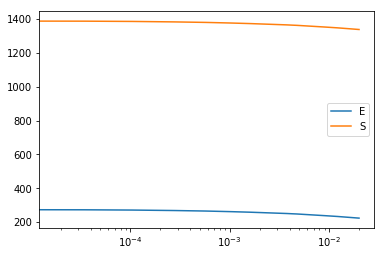

In [4]:
kf=10.
phit=0.001
L=1.0
dur=0.02#1e4
simrun=100
phis=[0.8]
for phi in phis:
    jobs = [{'kf':kf,'phit':phit,'phi':phi,'L':L,'duration':dur}]
    exe(jobs,simrun)